# Credit Card Fraud Detection | Project Machine Learning

## Background

Fraudulent transactions pose a significant threat to the financial industry, leading to monetary losses and reputational damage. As digital payments become increasingly popular, fraud detection systems must evolve to identify and mitigate suspicious activities effectively. This dataset provides a detailed view of transactions, making it an ideal resource for developing machine learning models to detect fraud in financial systems.

## Data Understanding

The dataset contains 6,362,620 entries representing financial transactions with the following features:

- step: Unit of time (e.g., hours) in the simulation.
- type: The type of transaction (e.g., CASH-IN, CASH-OUT, TRANSFER, etc.).
- amount: The transaction amount.
- nameOrig: Identifier for the sender of the transaction.
- oldbalanceOrg: Initial balance before the transaction for the sender.
- newbalanceOrig: Final balance after the transaction for the sender.
- nameDest: Identifier for the recipient of the transaction.
- oldbalanceDest: Initial balance before the transaction for the recipient.
- newbalanceDest: Final balance after the transaction for the recipient.
- isFraud: Binary variable indicating whether the transaction was fraudulent (1 for fraud, 0 otherwise).
- isFlaggedFraud: Binary variable indicating whether the transaction was flagged as potentially fraudulent.

## Problem Statement
Fraudulent activities in financial transactions are often difficult to detect due to their dynamic and adaptive nature. The primary challenge lies in identifying fraudulent transactions accurately while minimizing false positives to avoid unnecessary disruption for legitimate users.

## Objectives
- Develop a robust machine learning model to classify transactions as fraudulent or legitimate.
- Minimize false positives to reduce inconvenience for legitimate users.

## Potential Impact
- Financial Savings: Reducing fraudulent transactions can save significant costs for financial institutions and users.
- Improved Security: Enhancing fraud detection systems will increase user trust in digital financial platforms.
- Operational Efficiency: Automating fraud detection reduces manual intervention, enabling quicker transaction processing.

## Expected Outcomes
- A machine learning model capable of accurately classifying fraudulent and legitimate transactions.
- A reduction in the rate of false positives, enhancing the user experience.
- A scalable and automated fraud detection solution that can be integrated into financial systems.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings('ignore')

## Load and Explore Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
new_dir = "/content/drive/MyDrive/Project Credit Card Fraud Detection"
os.chdir(new_dir)
print("New Working Directory:", os.getcwd())

New Working Directory: /content/drive/MyDrive/Project Credit Card Fraud Detection


In [4]:
file_path = '/content/drive/MyDrive/Project Credit Card Fraud Detection/Credit_Card_Fraud_Detection.csv'

dataset = pd.read_csv(file_path)
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
print(f'Number of Row Dataset',dataset.shape[0])
print(f'Number of Feature Dataset',dataset.shape[1])

Number of Row Dataset 6362620
Number of Feature Dataset 11


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [ ]:
dataset.describe(include='object').T

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1902386530,3
nameDest,6362620,2722362,C1286084959,113


In [ ]:
dataset.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
categorical_features = dataset.select_dtypes(include='object').columns
numerical_features = dataset.select_dtypes(include=np.number).columns

uniq_value = {}
for feature in categorical_features:
    uniq_value[feature] = dataset[feature].nunique() / len(dataset) * 100
    print(f"Percentage Uniq Value for {feature}: {uniq_value[feature]:.2f}%")

Percentage Uniq Value for type: 0.00%
Percentage Uniq Value for nameOrig: 99.85%
Percentage Uniq Value for nameDest: 42.79%


In [ ]:
data = dataset.drop(columns=['isFlaggedFraud','nameOrig','nameDest'])
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


## Exploratory Data Analysis (EDA) and Feature Generation

### a. Univariate Analysis

#### Feature `isFraud`

This attribute is a binary label or indicator showing whether the transaction is involved in fraudulent activity or not. A value of 1 may indicate that the transaction is fraudulent, while a value of 0 indicates that the transaction is not involved in fraud. It is important to ensure that the distribution of data for this attribute is balanced. If there is an imbalance in the data, steps need to be taken to balance the data first. Balancing the data can be done using various techniques such as oversampling, undersampling, or using algorithms specifically designed to handle imbalanced data, so that the machine learning model can learn more effectively and provide accurate predictions. In this project, data balancing is done using the undersampling technique.

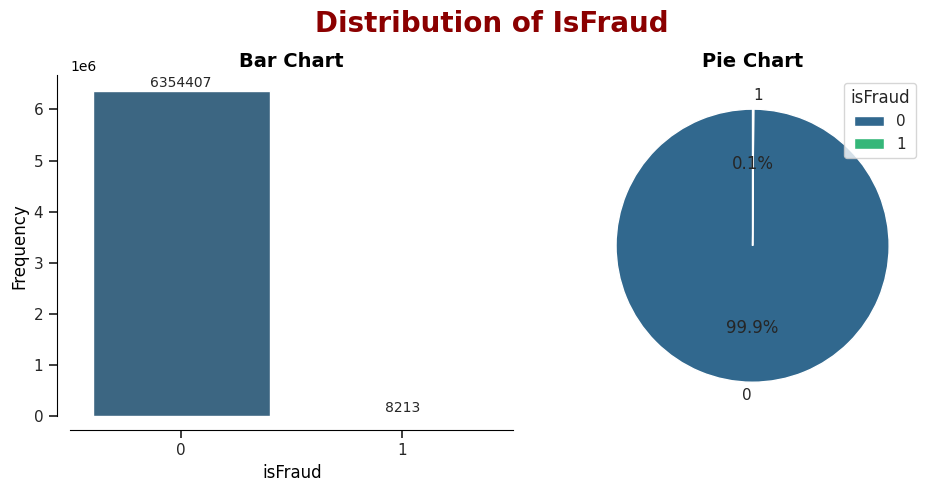

In [ ]:
isFraud_count = data["isFraud"].value_counts().reset_index()
isFraud_count.columns = ['isFraud','Frequency']
isFraud_count['Percentage'] = (isFraud_count['Frequency']/isFraud_count['Frequency'].sum())*100

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Distribution of IsFraud", fontsize=20, color='darkred', fontweight='bold')

# Barchart
sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(isFraud_count))
ax1 = sns.barplot(data=isFraud_count, x='isFraud', y='Frequency', palette=palette, ax=axes[0])


for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_xlabel("isFraud", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(isFraud_count))
axes[1].pie(isFraud_count['Percentage'], labels = isFraud_count['isFraud'], autopct="%1.1f%%", startangle=90, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(title='isFraud', loc='upper right')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('Distribution of IsFraud.png', dpi=300, bbox_inches='tight')
plt.show()

Non-fraud transactions dominate (99.9%) compared to fraud transactions (0.1%), indicating a highly imbalanced dataset.

Imbalance Data in Target

#### Feature `Step`

This feature is important for analyzing trends or transaction patterns over different time periods based on the reference time. By studying the step feature, we can identify specific times of day or longer time periods when transactions are more frequent, as well as detect patterns or anomalies that might indicate fraudulent activity. The reference time used in this project is 00:00. Therefore, the step feature is converted to the remainder of the division by 24 (the number of hours in a day) to determine the exact hour when the transaction occurred.

In [ ]:
data['step'] = data['step']%24
data.step.describe()

,step
count,6.362620e+06
mean,1.532145e+01
std,4.321799e+00
min,0.000000e+00
25%,1.200000e+01
50%,1.600000e+01
75%,1.900000e+01
max,2.300000e+01


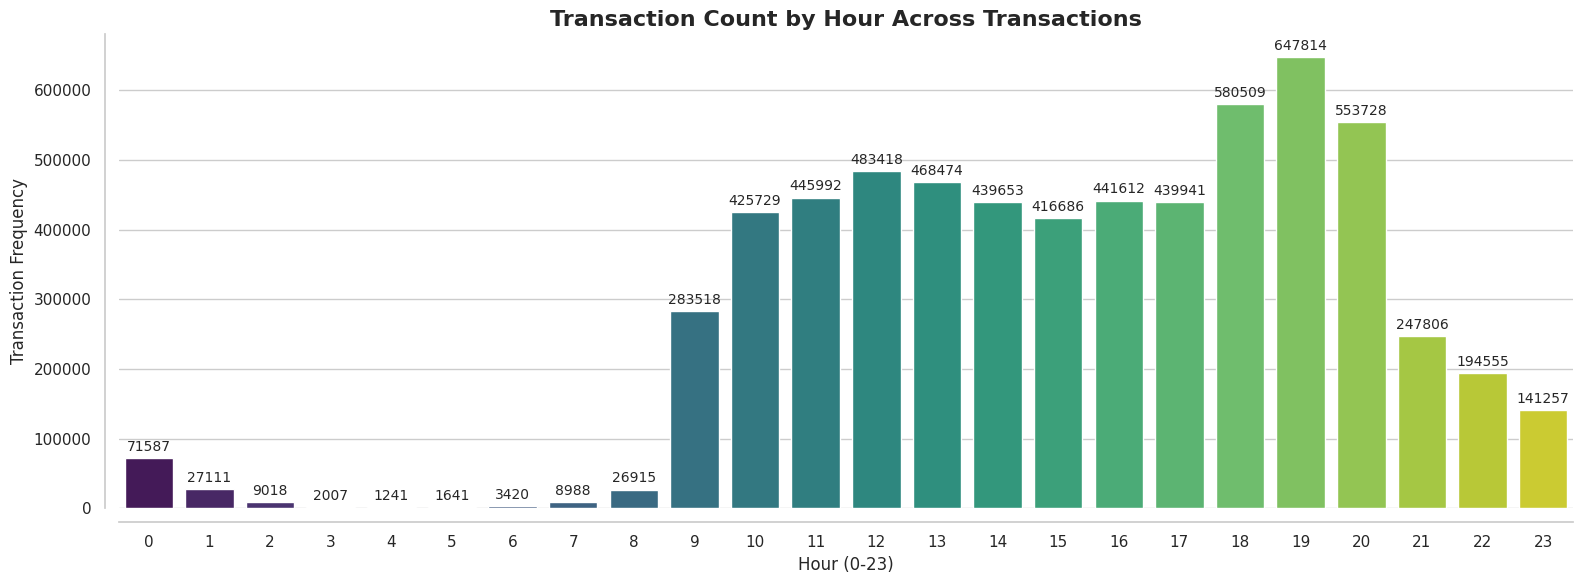

In [ ]:
hour_df = data.step.value_counts().reset_index()
hour_df.columns = ['hour', 'frequency']

plt.figure(figsize=(16, 6))
ax = sns.barplot(data=hour_df, x='hour', y='frequency', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=10, padding=3)

ax.set_title("Transaction Count by Hour Across Transactions", fontsize=16, fontweight='bold')
ax.set_xlabel("Hour (0-23)", fontsize=12)
ax.set_ylabel("Transaction Frequency", fontsize=12)

sns.despine(offset=10)

plt.tight_layout()
plt.savefig('Transaction Count by Hour Across Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

- Evening Peak Activity: Transactions peak at 19:00 (7 PM) with 647,814 transactions, the highest across all hours.
- High Evening Engagement: The period from 18:00 to 20:00 collectively has the highest transaction volume.
- Morning Build-up: Transaction counts start to rise significantly after 08:00, reaching a steady volume by 12:00 (noon) with 483,418 transactions.
- Low Late-Night Activity: Early morning hours (00:00 to 05:00) show minimal activity, with the lowest being 1,241 transactions at 03:00.
- Gradual Decline at Night: Transaction frequency steadily decreases after 20:00, with 141,257 transactions by 23:00.

In [ ]:
def categorize_time(step):
    if 0 <= step <= 4:
        return 'Midnight'
    elif 4 < step <= 6:
        return 'Dawn'
    elif 6 < step <= 12:
        return 'Morning'
    elif 12 < step <= 18:
        return 'Afternoon'
    elif 18 < step <= 20:
        return 'Evening'
    elif 20 < step <= 24:
        return 'Night'
    else:
        return 'Unknown'

data['categorize_time'] = data['step'].apply(categorize_time)
category_time_df = pd.DataFrame(data['categorize_time'].value_counts()).reset_index()
category_time_df.columns = ['categorize_time', 'count']

category_durations = {
    'Midnight': 4,
    'Dawn': 2,
    'Morning': 6,
    'Afternoon': 6,
    'Evening': 2,
    'Night': 4
}

category_time_df['duration'] = category_time_df['categorize_time'].map(category_durations)
category_time_df['count_per_hour'] = round(category_time_df['count'] / category_time_df['duration'], 0)
category_time_df.sort_values(by='count_per_hour', ascending=False, inplace=True)
category_time_df['percentages'] = category_time_df['count_per_hour'] / category_time_df['count_per_hour'].sum() * 100

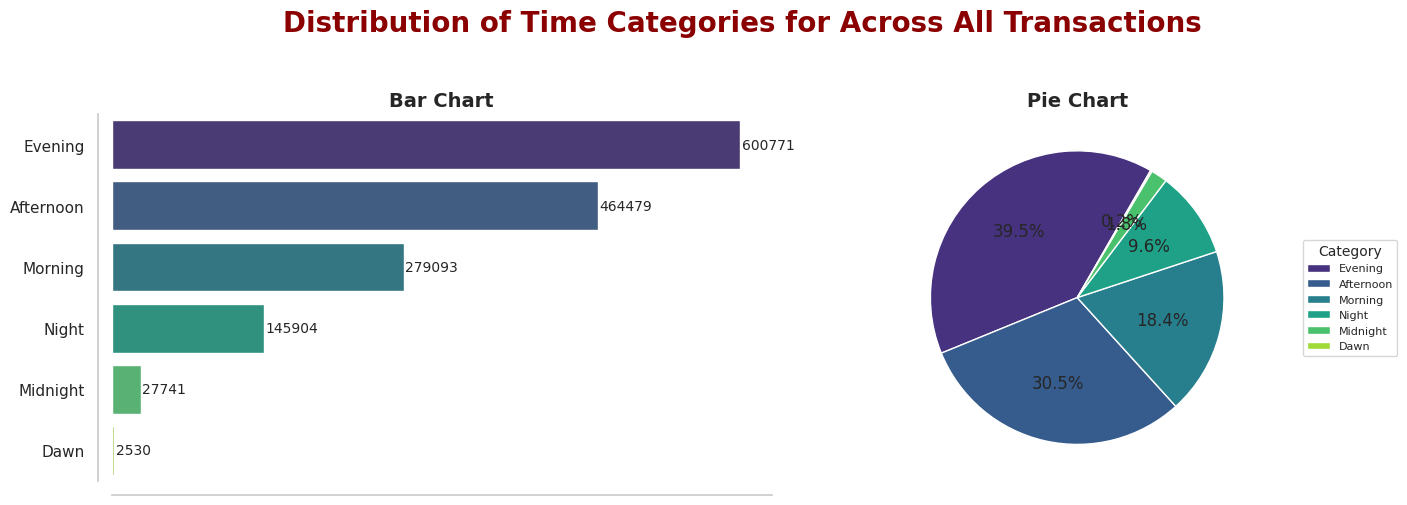

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of Time Categories for Across All Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(category_time_df))
ax1 = sns.barplot(data=category_time_df, y='categorize_time', x='count_per_hour', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Category", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(category_time_df))
axes[1].pie(category_time_df['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='Category',
    labels=category_time_df['categorize_time'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of Time Categories for Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

- Transactions occur most frequently in the evening (18:00–20:00), accounting for 600,771 transactions (39.5%).
- The afternoon (12:00–18:00) is the second most active period, with 464,479 transactions (30.5%).
- Morning (06:00–12:00) accounts for 279,093 transactions (18.4%), showing moderate activity.
- Night (20:00–24:00) and midnight (00:00–04:00) are less active, with 9.6% and 0.8% of transactions, respectively.
- Dawn (04:00–06:00) has negligible activity, contributing only 0.2%.

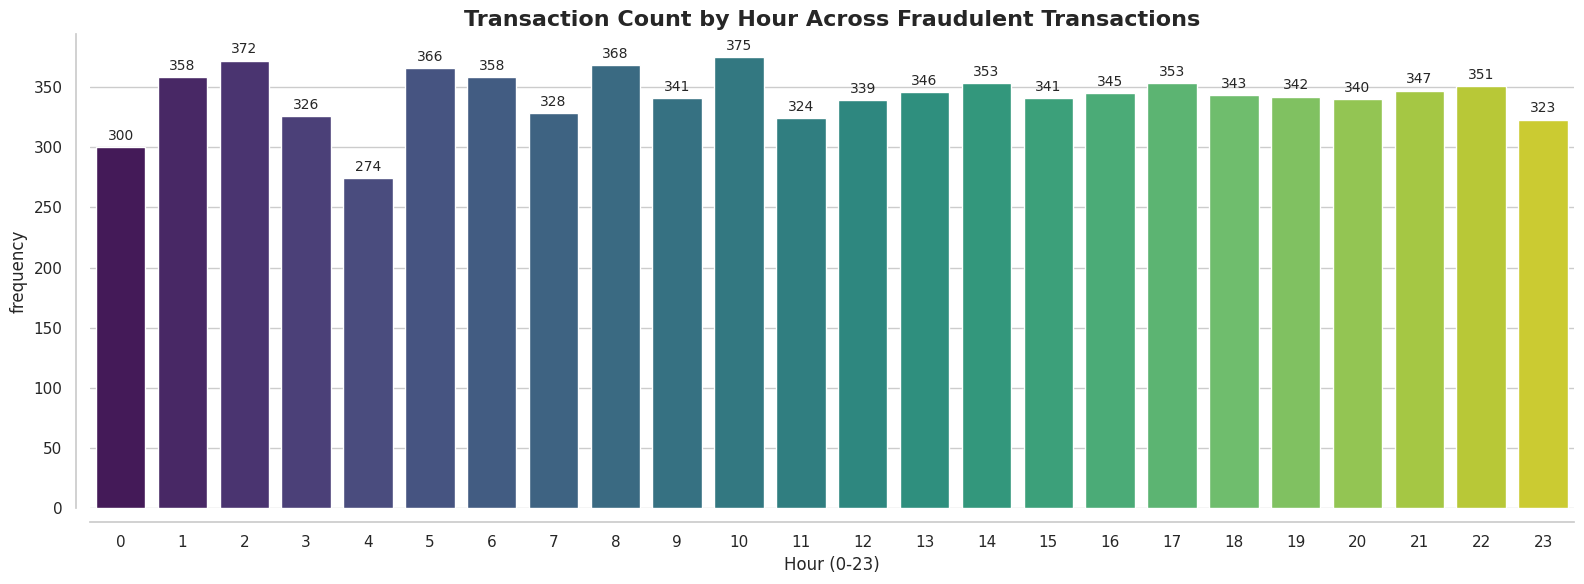

In [ ]:
fraud_data = data[data['isFraud']==1]
fraud_df = fraud_data.step.value_counts().reset_index()
fraud_df.columns = ['hour', 'frequency']

plt.figure(figsize=(16, 6))
ax = sns.barplot(data=fraud_df, x='hour', y='frequency', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=10, padding=3)

ax.set_title("Transaction Count by Hour Across Fraudulent Transactions", fontsize=16, fontweight='bold')
ax.set_xlabel("Hour (0-23)", fontsize=12)

sns.despine(offset=10)

plt.tight_layout()
plt.savefig('Transaction Count by Hour Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

- Fraudulent transactions are fairly evenly distributed throughout the day, with no significant peaks or drops.
- The hour with the highest count of fraudulent transactions is 14:00 (2 PM), with 375 transactions.
- The lowest activity is observed during 04:00 (4 AM), with 274 transactions.
- Early morning hours (00:00–04:00) generally show lower fraudulent activity compared to the rest of the day.

- 00:00 - 04:00: Midnight
- 04:00 - 06:00: Dawn
- 06:00 - 12:00: Morning
- 12:00 - 18:00: Afternoon
- 18:00 - 20:00: Evening
- 20:00 - 24:00: Night

In [ ]:
fraud_category_time_data = pd.DataFrame(fraud_data['categorize_time'].value_counts()).reset_index()
fraud_category_time_data['duration'] = fraud_category_time_data['categorize_time'].map(category_durations)
fraud_category_time_data['count_per_hour'] = round(fraud_category_time_data['count']/fraud_category_time_data['duration'], 0)

fraud_category_time_data.sort_values(by='count_per_hour', ascending=False, inplace=True)
fraud_category_time_data['percentages'] = fraud_category_time_data["count_per_hour"]/fraud_category_time_data["count_per_hour"].sum()*100
fraud_category_time_data

,categorize_time,count,duration,count_per_hour,percentages
2,Midnight,1630,4,408.0,19.815444
4,Dawn,724,2,362.0,17.581350
0,Afternoon,2081,6,347.0,16.852841
1,Morning,2075,6,346.0,16.804274
5,Evening,682,2,341.0,16.561438
3,Night,1021,4,255.0,12.384653


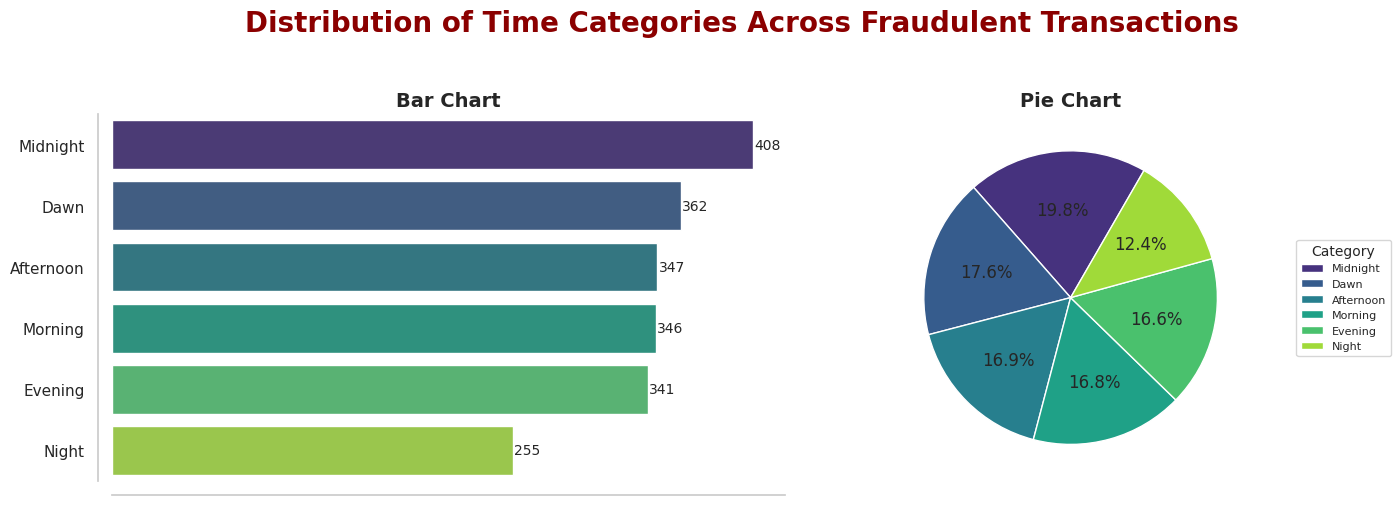

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of Time Categories Across Fraudulent Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(category_time_df))
ax1 = sns.barplot(data=fraud_category_time_data, y='categorize_time', x='count_per_hour', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Category", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(category_time_df))
axes[1].pie(fraud_category_time_data['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='Category',
    labels=fraud_category_time_data['categorize_time'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of Time Categories Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

- Midnight Dominates Fraudulent Transactions: The Midnight category (00:00–04:00) has the highest proportion of fraudulent transactions, with 19.8% (408 transactions).
- Dawn and Afternoon Show Slightly Lower Activity: Fraudulent transactions during Dawn (04:00–06:00) and Afternoon (12:00–18:00) are 17.6% and 16.9%, respectively.
- Evening and Morning Are Similar: Both Evening (18:00–20:00) and Morning (06:00–12:00) account for approximately 16.6%–16.8% of fraudulent transactions.
- Night Has the Lowest Fraudulent Activity: Fraudulent transactions are least frequent during the Night (20:00–24:00), contributing only 12.4% (255 transactions).

#### Feature `type`

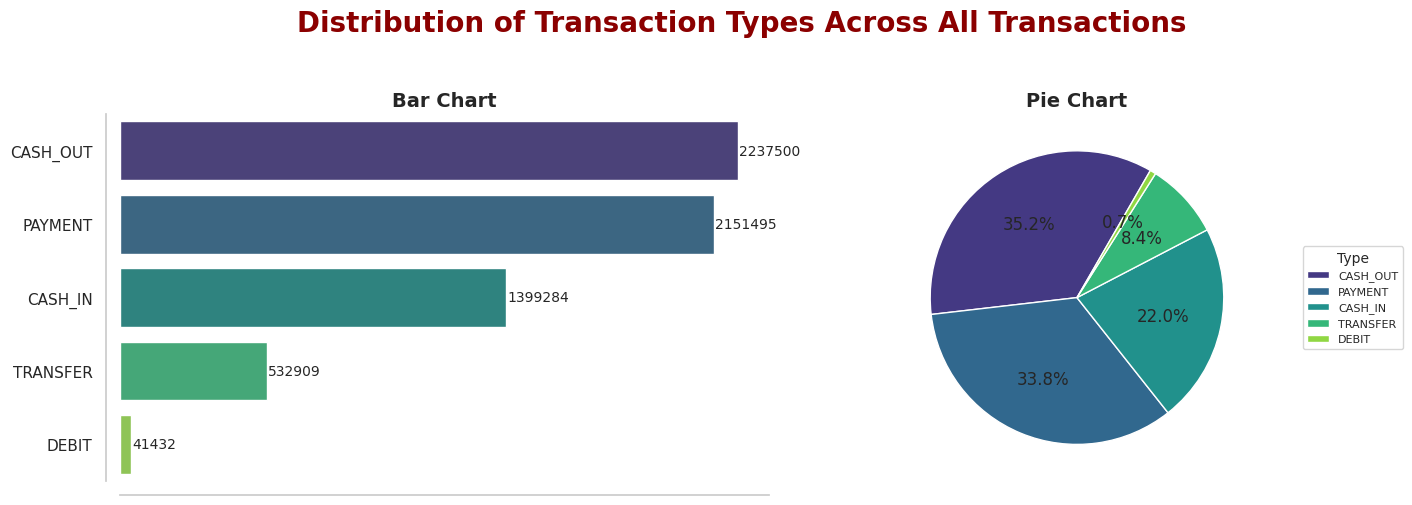

In [ ]:
type_df = data['type'].value_counts().reset_index()
type_df.columns = ['type','frequency']
type_df['percentages'] = type_df['frequency']/type_df['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of Transaction Types Across All Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(type_df))
ax1 = sns.barplot(data=type_df, y='type', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Type", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(type_df))
axes[1].pie(type_df['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='Type',
    labels=type_df['type'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of Transaction Types Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. CASH_OUT is the Most Frequent Transaction Type  
   - It constitutes **35.2%** of all transactions, with a total count of **2,237,500**.

2. PAYMENT is the Second Most Common
   - Representing **33.8%** of transactions, with **2,151,495** recorded.

3. CASH_IN is Significant but Lower
   - Accounts for **22.0%**, totaling **1,399,284** transactions.

4. TRANSFER and DEBIT are Minimal
   - **TRANSFER** transactions make up only **8.4%** (**532,909**).  
   - **DEBIT** transactions are the least common, with just **0.7%** (**41,432**).

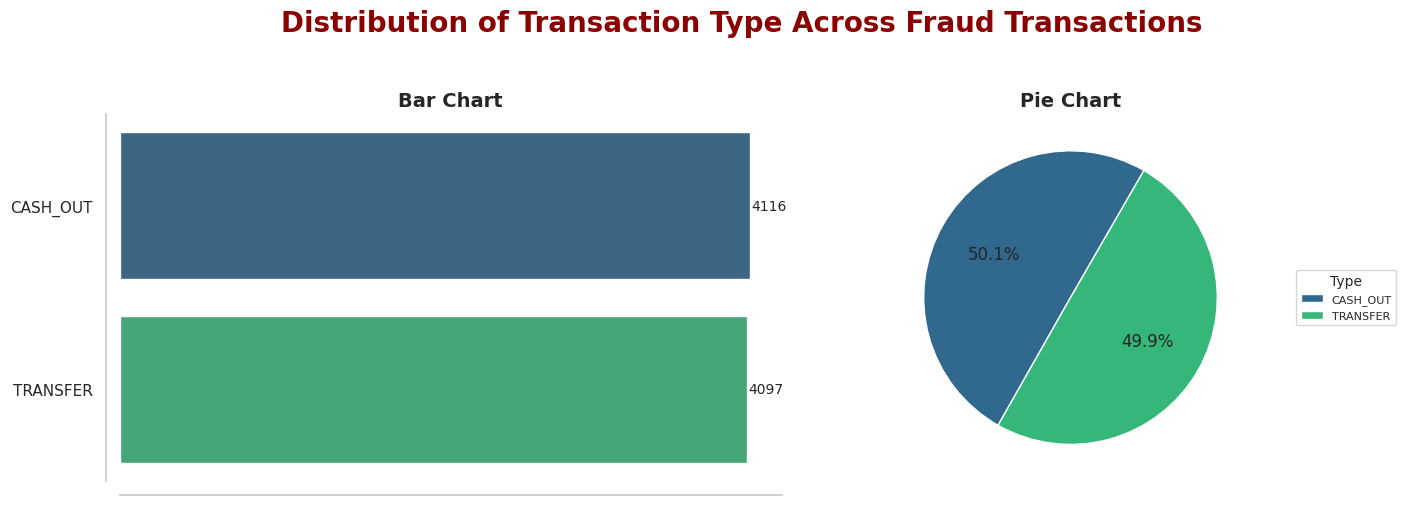

In [ ]:
fraud_type_df = fraud_data['type'].value_counts().reset_index()
fraud_type_df.columns = ['type','frequency']
fraud_type_df['percentages'] = fraud_type_df['frequency']/fraud_type_df['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of Transaction Type Across Fraud Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(fraud_type_df))
ax1 = sns.barplot(data=fraud_type_df, y='type', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Type", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(fraud_type_df))
axes[1].pie(fraud_type_df['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='Type',
    labels=fraud_type_df['type'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of Transaction Type Across Fraud Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

From this dataset, we can conclude that fraudulent transactions occur only in `CASH_OUT` and `TRANSFER` types, with a relatively equal ratio (50:50)

#### Feature `amount`

This is the amount of money involved in the transaction. This value indicates the size of the transaction conducted, typically in a specific currency unit, such as the US Dollar (USD). It reflects the magnitude and scale of the transactions being analyzed.

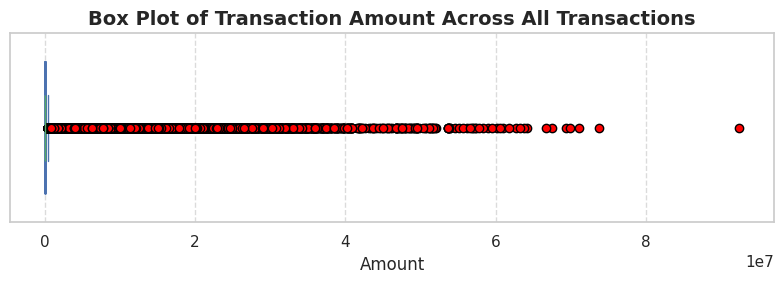

In [ ]:
plt.figure(figsize=(8, 3))
data['amount'].plot(kind='box', patch_artist=True, notch=True,
                    vert=False, widths=0.7, flierprops=dict(
                        markerfacecolor='red', marker='o'))

plt.title('Box Plot of Transaction Amount Across All Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()
plt.savefig('Box Plot of Transaction Amount Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. Majority of transactions are concentrated near the lower end of the scale, as shown by the dense boxplot close to zero.

2. Significant outliers are present, with transaction amounts reaching as high as **8e7 (80 million)**.

3. The distribution is highly skewed, with a small number of very high-value transactions creating a long tail.

4. Careful handling of outliers is necessary during analysis to avoid distortion in aggregated metrics such as mean or variance.

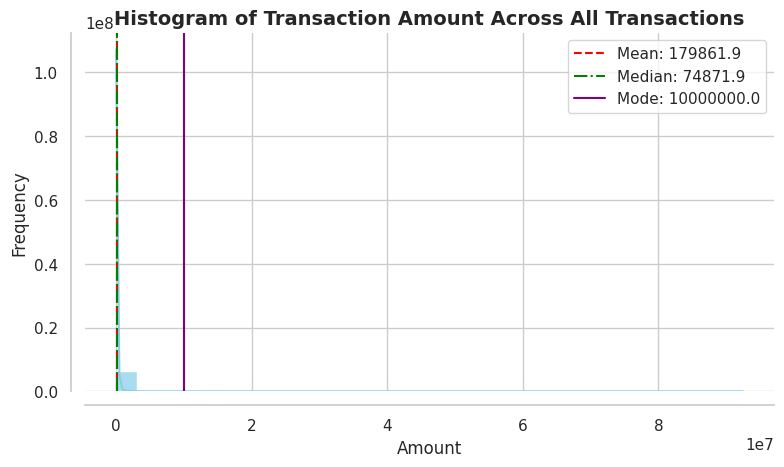

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='amount', kde=True, bins=30, color='skyblue', alpha=0.7)

mean = data["amount"].mean()
median = data["amount"].median()
mode = data["amount"].mode()[0]

plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.1f}')
plt.axvline(mode, color='purple', linestyle='-', label=f'Mode: {mode:.1f}')

plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Transaction Amount Across All Transactions', fontsize=14, fontweight='bold')
plt.legend()

sns.despine(offset= 10)
plt.tight_layout()
plt.savefig('Histogram of Transaction Amount Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. The **mean transaction amount** is **17,961.9**, which is much lower than both the **median (74,871.9)** and **mode (10,000,000.0)**, indicating a highly skewed distribution.

2. The **mode of 10,000,000.0** suggests a specific transaction amount is extremely frequent compared to others.

3. Most transactions are concentrated in the lower range, with a steep drop-off in frequency for higher amounts.

4. The presence of high-value transactions skews the mean upward, emphasizing the impact of outliers.

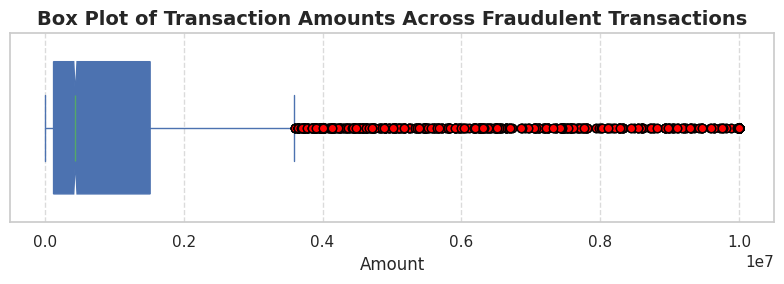

In [ ]:
plt.figure(figsize=(8, 3))
fraud_data['amount'].plot(kind='box', patch_artist=True, notch=True,
                    vert=False, widths=0.7, flierprops=dict(
                        markerfacecolor='red', marker='o'))

plt.title('Box Plot of Transaction Amounts Across Fraudulent Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()
plt.savefig('Box Plot of Amounts Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. Most fraudulent transaction amounts are concentrated within a lower range, as indicated by the compact box in the box plot.

2. There are significant outliers, with amounts reaching close to **1e7 (10 million)**.

3. The distribution is highly skewed, with a small number of high-value fraudulent transactions creating a long tail.

4. The interquartile range (IQR) shows most fraudulent amounts are tightly clustered, but outliers extend far beyond the upper whisker.

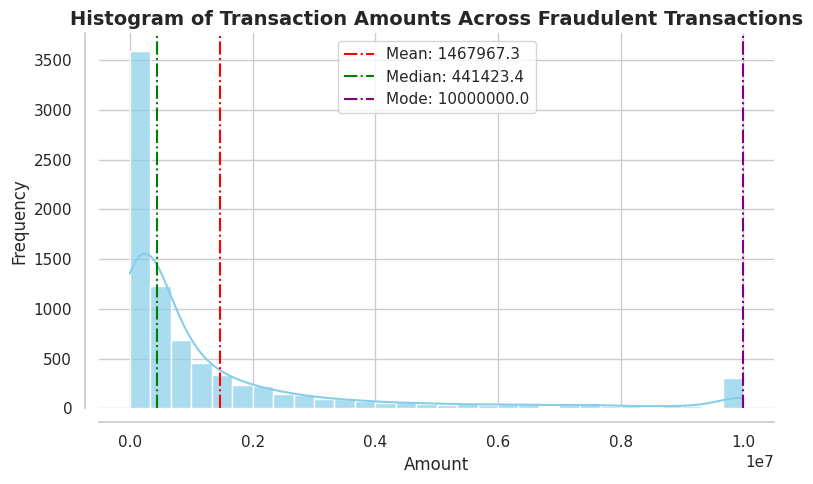

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=fraud_data, x='amount', kde=True, bins=30, color='skyblue', alpha=0.7)

mean = fraud_data["amount"].mean()
median = fraud_data["amount"].median()
mode = fraud_data["amount"].mode()[0]

plt.axvline(mean, color='red', linestyle='-.', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.1f}')
plt.axvline(mode, color='purple', linestyle='-.', label=f'Mode: {mode:.1f}')

plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Transaction Amounts Across Fraudulent Transactions', fontsize=14, fontweight='bold')
plt.legend()

sns.despine(offset= 10)
plt.tight_layout()
plt.savefig('Histogram of Amounts Across Fraudulent Transaction.png', dpi=300, bbox_inches='tight')
plt.show()

1. The **mean transaction amount** for fraudulent transactions is **1,467,967.3**, significantly influenced by high-value outliers.

2. The **median amount** is much lower at **441,423.4**, indicating most fraudulent transactions are below the mean.

3. The **mode of 10,000,000.0** highlights a specific recurring high-value transaction among fraudulent activities.

4. The histogram shows a steep concentration of transactions in the lower range, with a gradual tapering as amounts increase.

5. High-value outliers create a long tail, significantly impacting the overall distribution.


In [ ]:
def category(x):
    if 0<= x < 1000:
        return 'Small'
    elif 1000 <= x < 100000:
        return 'Medium'
    elif 100000 <= x < 1000000:
        return 'Large'
    else:
        return 'Very Large'

data['categorize_amount'] = data['amount'].apply(category)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,categorize_time,categorize_amount
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,Midnight,Medium
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,Midnight,Medium
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,Midnight,Small
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,Midnight,Small
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,Midnight,Medium


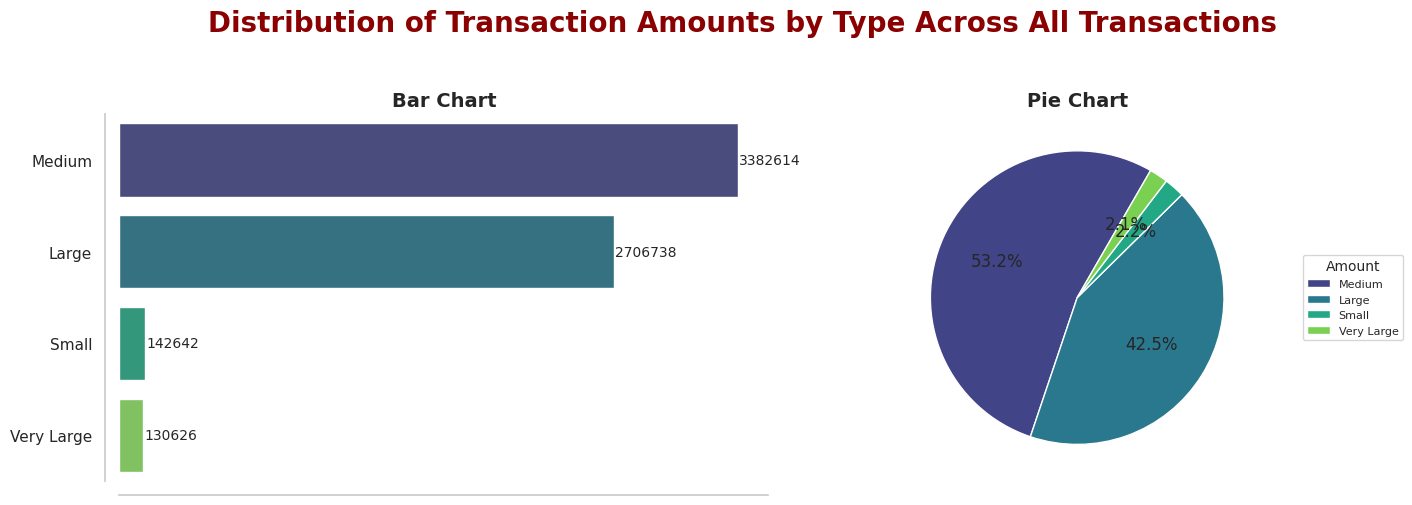

In [ ]:
data_amount_type = data['categorize_amount'].value_counts().reset_index()
data_amount_type.columns = ['amount','frequency']
data_amount_type['percentages'] = data_amount_type['frequency']/data_amount_type['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of Transaction Amounts by Type Across All Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(data_amount_type))
ax1 = sns.barplot(data=data_amount_type, y='amount', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Type", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(data_amount_type))
axes[1].pie(data_amount_type['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='Amount',
    labels=data_amount_type['amount'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of Transaction Amounts by Type Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Medium-sized transactions** dominate, accounting for **53.2%** of all transactions (**3,382,614**).

2. **Large transactions** follow, contributing **42.5%** of the total (**2,706,738**).

3. **Small transactions** make up only **2.2%** (**142,642**) of the total.

4. **Very large transactions** are the least frequent, representing **2.1%** of all transactions (**130,626**).

5. The distribution indicates a heavy reliance on medium and large transaction amounts, with small and very large transactions being relatively rare.

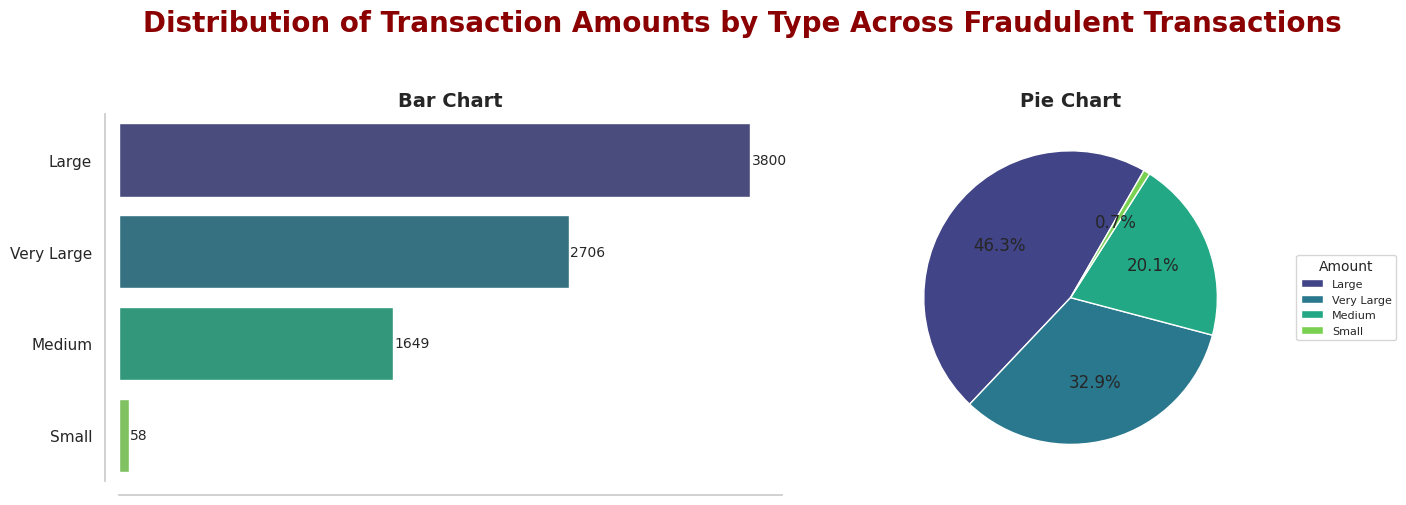

In [ ]:
fraud_data['categorize_amount'] = fraud_data['amount'].apply(category)
fraud_data_amount_type = fraud_data['categorize_amount'].value_counts().reset_index()
fraud_data_amount_type.columns = ['amount','frequency']
fraud_data_amount_type['percentages'] = fraud_data_amount_type['frequency']/fraud_data_amount_type['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of Transaction Amounts by Type Across Fraudulent Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(fraud_data_amount_type))
ax1 = sns.barplot(data=fraud_data_amount_type, y='amount', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Type", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(fraud_data_amount_type))
axes[1].pie(fraud_data_amount_type['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='Amount',
    labels=fraud_data_amount_type['amount'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of Transaction Amounts by Type Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

#### Feature `oldbalanceOrg`

The feature `oldbalanceOrg` represents the balance or amount of money in the customer's account before the transaction takes place. This feature is important for tracking balance changes and detecting anomalies in transactions, such as fraudulent activity.

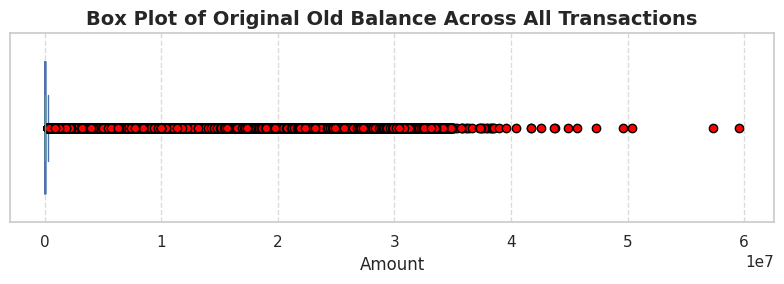

In [ ]:
plt.figure(figsize=(8, 3))
data['oldbalanceOrg'].plot(kind='box', patch_artist=True, notch=True,
                    vert=False, widths=0.7, flierprops=dict(
                        markerfacecolor='red', marker='o'))

plt.title('Box Plot of Original Old Balance Across All Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()
plt.savefig('Box Plot of Original Old Balance Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. Most original old balance values are concentrated near the lower end of the scale, as shown by the compact box in the box plot.

2. Significant outliers are present, with values reaching up to **6e7 (60 million)**.

3. The distribution is heavily skewed, with a small number of extremely high balances creating a long tail.

4. The interquartile range (IQR) highlights that the majority of balances are tightly clustered, but the outliers extend far beyond the upper whisker.

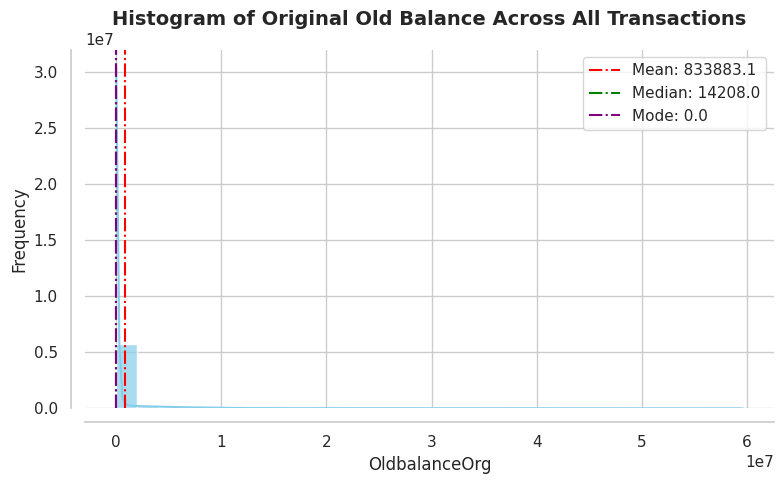

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='oldbalanceOrg', kde=True, bins=30, color='skyblue', alpha=0.7)

mean = data["oldbalanceOrg"].mean()
median = data["oldbalanceOrg"].median()
mode = data["oldbalanceOrg"].mode()[0]

plt.axvline(mean, color='red', linestyle='-.', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.1f}')
plt.axvline(mode, color='purple', linestyle='-.', label=f'Mode: {mode:.1f}')

plt.xlabel('OldbalanceOrg', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Original Old Balance Across All Transactions', fontsize=14, fontweight='bold')
plt.legend()

sns.despine(offset= 10)
plt.tight_layout()
plt.savefig('Histogram of Original Old Balance Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. The **mean old balance** is **833,883.1**, much higher than the **median (14,208.0)** and **mode (0.0)**, indicating a heavily skewed distribution.

2. The histogram shows a steep concentration of balances near zero, with very few high balance values.

3. A small number of extremely high balances create a long tail, significantly affecting the mean.

4. Most transactions involve accounts with minimal or no old balance, as indicated by the dominant frequency near the mode of **0.0**.

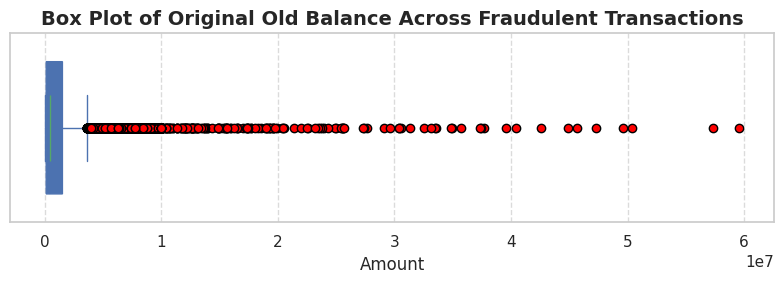

In [ ]:
plt.figure(figsize=(8, 3))
fraud_data['oldbalanceOrg'].plot(kind='box', patch_artist=True, notch=True,
                    vert=False, widths=0.7, flierprops=dict(
                        markerfacecolor='red', marker='o'))

plt.title('Box Plot of Original Old Balance Across Fraudulent Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()
plt.savefig('Box Plot of Original Old Balance Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. Most fraudulent transactions have an old balance concentrated near the lower range, as indicated by the compact box.

2. Significant outliers are present, with balances reaching up to **6e7 (60 million)**.

3. The distribution is heavily skewed, with a small number of extremely high old balances creating a long tail.

4. The interquartile range (IQR) indicates that most fraudulent balances are tightly clustered, but outliers extend far beyond the upper whisker.

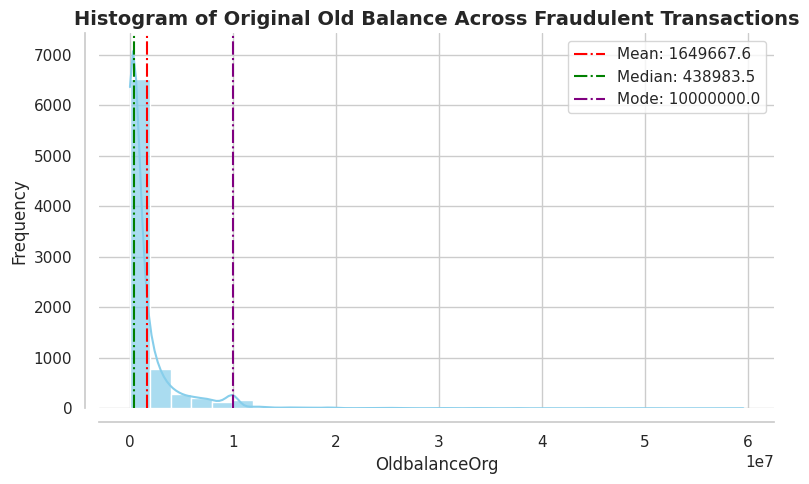

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=fraud_data, x='oldbalanceOrg', kde=True, bins=30, color='skyblue', alpha=0.7)

mean = fraud_data["oldbalanceOrg"].mean()
median = fraud_data["oldbalanceOrg"].median()
mode = fraud_data["oldbalanceOrg"].mode()[0]

plt.axvline(mean, color='red', linestyle='-.', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.1f}')
plt.axvline(mode, color='purple', linestyle='-.', label=f'Mode: {mode:.1f}')

plt.xlabel('OldbalanceOrg', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Original Old Balance Across Fraudulent Transactions', fontsize=14, fontweight='bold')
plt.legend()

sns.despine(offset= 10)
plt.tight_layout()
plt.savefig('Histogram of Original Old Balance Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. The **mean old balance** for fraudulent transactions is **1,649,667.6**, significantly influenced by high-value outliers.

2. The **median balance** is **438,983.5**, much lower than the mean, highlighting the skewness in the data.

3. The **mode of 10,000,000.0** indicates a specific recurring balance amount in fraudulent transactions.

4. The histogram shows a steep concentration near zero, with a rapid decline in frequency as balances increase.

5. A small number of very high balances create a long tail, significantly affecting the overall distribution.

In [ ]:
def category(x):
    if 0<= x < 1000:
        return 'Small'
    elif 1000 <= x < 100000:
        return 'Medium'
    elif 100000 <= x < 1000000:
        return 'Large'
    else:
        return 'Very Large'

In [ ]:
data['categorize_oldbalancOrg'] = data['oldbalanceOrg'].map(category)
fraud_data['categorize_oldbalancOrg'] = fraud_data['oldbalanceOrg'].map(category)

data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,categorize_time,categorize_amount,categorize_oldbalancOrg
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,Midnight,Medium,Large
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,Midnight,Medium,Medium
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,Midnight,Small,Small
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,Midnight,Small,Small
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,Midnight,Medium,Medium


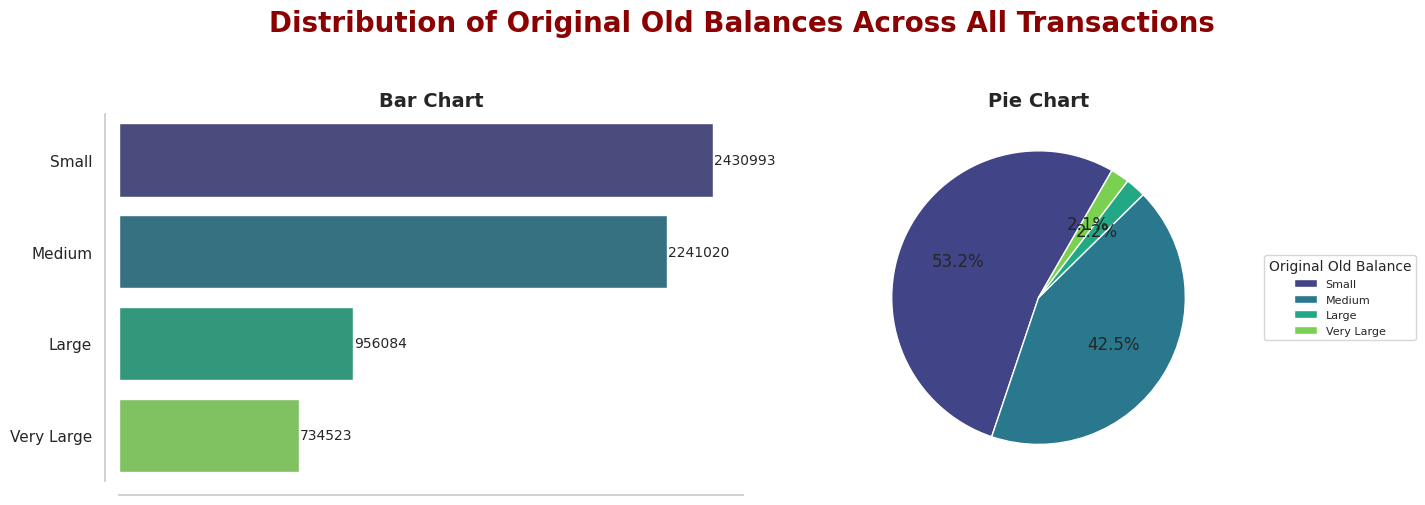

In [ ]:
data_oldbalanceorg_type = data['categorize_oldbalancOrg'].value_counts().reset_index()
data_oldbalanceorg_type.columns = ['category','frequency']
data_oldbalanceorg_type['percentages'] = data_oldbalanceorg_type['frequency']/data_oldbalanceorg_type['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of Original Old Balances Across All Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(data_amount_type))
ax1 = sns.barplot(data=data_oldbalanceorg_type, y='category', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Category", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(data_amount_type))
axes[1].pie(data_amount_type['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='Original Old Balance',
    labels=data_oldbalanceorg_type['category'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of Original Old Balances Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Small old balances** dominate the distribution, accounting for **53.2%** of all transactions (**2,430,993**).

2. **Medium old balances** are the second most common, representing **42.5%** of transactions (**2,241,020**).

3. **Large old balances** contribute **2.1%** of transactions (**956,084**).

4. **Very large old balances** are the least frequent, making up **2.2%** of transactions (**734,523**).

5. The data highlights a strong concentration of small and medium old balances, with large and very large balances being relatively rare.

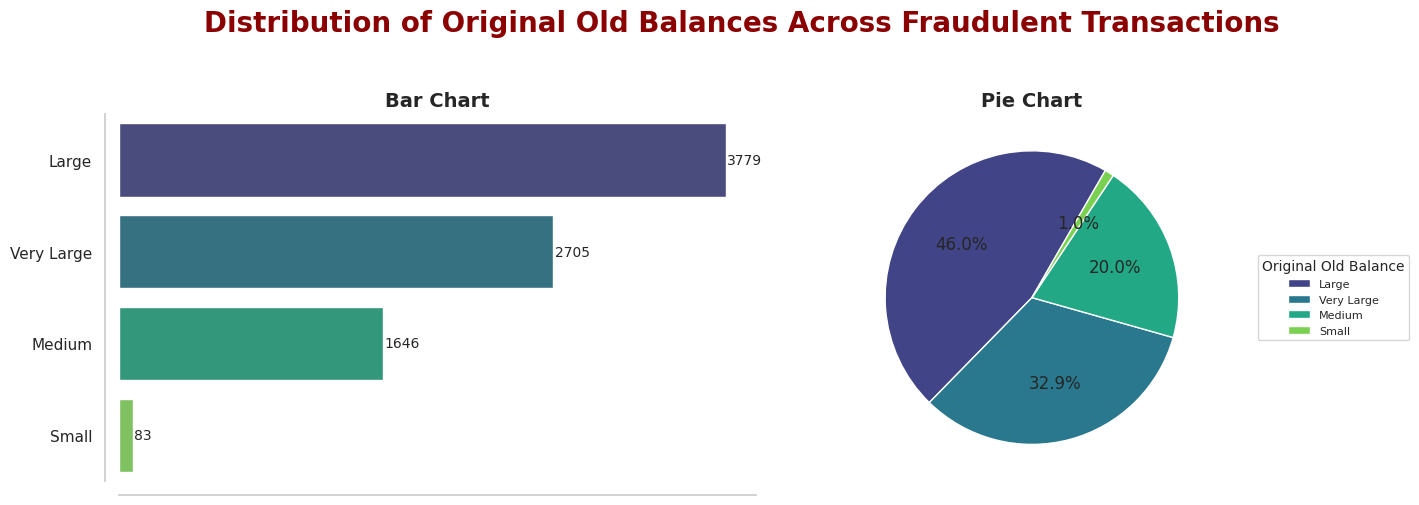

In [ ]:
fraud_data_oldbalanceorg_type = fraud_data['categorize_oldbalancOrg'].value_counts().reset_index()
fraud_data_oldbalanceorg_type.columns = ['category','frequency']
fraud_data_oldbalanceorg_type['percentages'] = fraud_data_oldbalanceorg_type['frequency']/fraud_data_oldbalanceorg_type['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of Original Old Balances Across Fraudulent Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(data_amount_type))
ax1 = sns.barplot(data=fraud_data_oldbalanceorg_type, y='category', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Category", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(data_amount_type))
axes[1].pie(fraud_data_oldbalanceorg_type['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='Original Old Balance',
    labels=fraud_data_oldbalanceorg_type['category'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of Original Old Balances Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Large old balances** dominate fraudulent transactions, accounting for **46.0%** of the total (**3,779**).

2. **Very large old balances** are the second most frequent, representing **32.9%** of fraudulent transactions (**2,705**).

3. **Medium old balances** contribute **20.0%** of fraudulent transactions (**1,646**).

4. **Small old balances** are negligible, making up only **1.0%** of fraudulent transactions (**83**).

5. The distribution emphasizes the concentration of fraudulent activity in large and very large old balances, with small balances being extremely rare.

#### Feature `newbalanceOrig`

This feature represents the new balance in the customer's account after the transaction is completed. It is the amount of money remaining in the account after the transaction is processed. This feature is important for tracking balance changes after transactions and for detecting potential anomalies or errors in transaction processing.

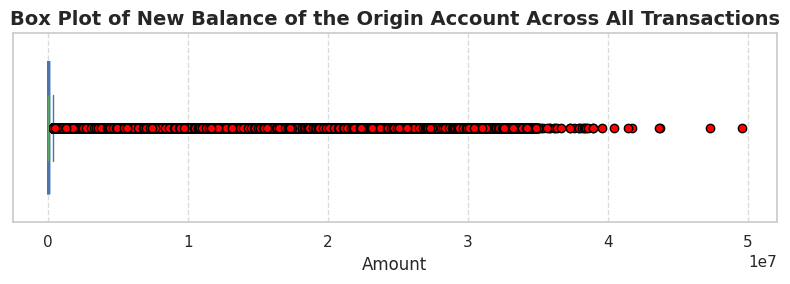

In [ ]:
plt.figure(figsize=(8, 3))
data['newbalanceOrig'].plot(kind='box', patch_artist=True, notch=True,
                    vert=False, widths=0.7, flierprops=dict(
                        markerfacecolor='red', marker='o'))

plt.title('Box Plot of New Balance of the Origin Account Across All Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()
plt.savefig('Box Plot of New Balance of the Origin Account Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. Most new balances for origin accounts are concentrated near the lower end, as indicated by the compact box.

2. Significant outliers are present, with new balances reaching up to **5e7 (50 million)**.

3. The distribution is heavily skewed, with a small number of high new balances creating a long tail.

4. The interquartile range (IQR) highlights that most transactions involve tightly clustered new balances, while outliers extend far beyond the upper whisker.

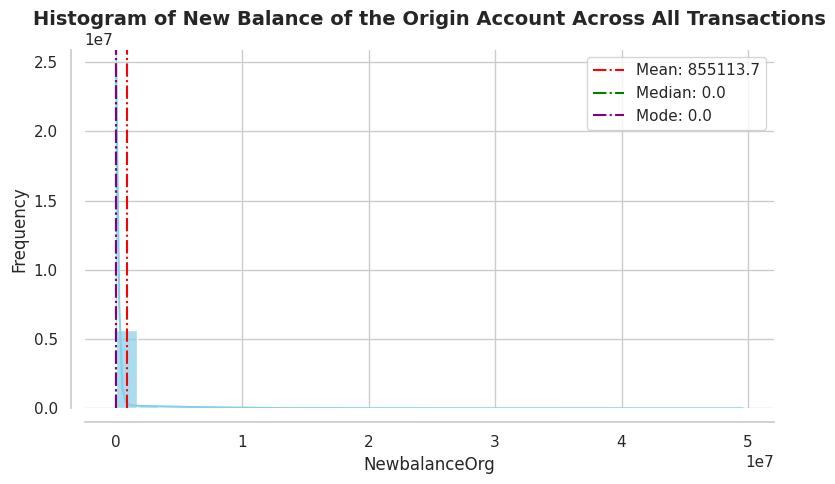

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='newbalanceOrig', kde=True, bins=30, color='skyblue', alpha=0.7)

mean = data["newbalanceOrig"].mean()
median = data["newbalanceOrig"].median()
mode = data["newbalanceOrig"].mode()[0]

plt.axvline(mean, color='red', linestyle='-.', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.1f}')
plt.axvline(mode, color='purple', linestyle='-.', label=f'Mode: {mode:.1f}')

plt.xlabel('NewbalanceOrg', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of New Balance of the Origin Account Across All Transactions', fontsize=14, fontweight='bold')
plt.legend()

sns.despine(offset= 10)
plt.tight_layout()
plt.savefig('Histogram of New Balance of the Origin Account Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. The **mean new balance** for origin accounts is **855,113.7**, significantly influenced by high-value outliers.

2. The **median and mode** are both **0.0**, indicating that most origin accounts have no remaining balance after transactions.

3. The histogram shows a steep concentration near zero, with very few accounts having higher new balances.

4. A small number of extremely high balances create a long tail, skewing the overall distribution.

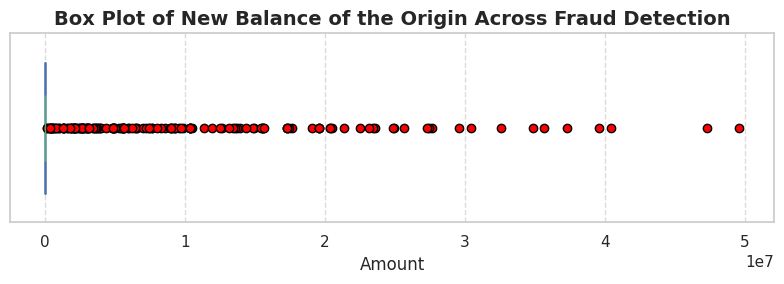

In [ ]:
plt.figure(figsize=(8, 3))
fraud_data['newbalanceOrig'].plot(kind='box', patch_artist=True, notch=True,
                    vert=False, widths=0.7, flierprops=dict(
                        markerfacecolor='red', marker='o'))

plt.title('Box Plot of New Balance of the Origin Across Fraud Detection', fontsize=14, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()
plt.savefig('Box Plot of New Balance of the Origin Across Fraud Detection.png', dpi=300, bbox_inches='tight')
plt.show()

1. Most fraudulent transactions result in new balances concentrated near the lower end, as indicated by the compact box.

2. Significant outliers are present, with new balances reaching up to **5e7 (50 million)**.

3. The distribution is heavily skewed, with a small number of high new balances creating a long tail.

4. The interquartile range (IQR) suggests that most fraudulent transactions leave minimal balances in origin accounts, while outliers significantly extend the range.

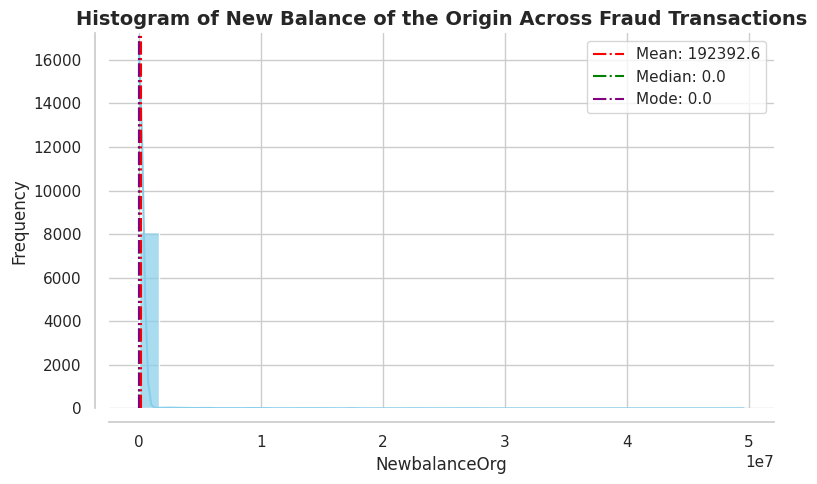

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=fraud_data, x='newbalanceOrig', kde=True, bins=30, color='skyblue', alpha=0.7)

mean = fraud_data["newbalanceOrig"].mean()
median = fraud_data["newbalanceOrig"].median()
mode = fraud_data["newbalanceOrig"].mode()[0]

plt.axvline(mean, color='red', linestyle='-.', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.1f}')
plt.axvline(mode, color='purple', linestyle='-.', label=f'Mode: {mode:.1f}')

plt.xlabel('NewbalanceOrg', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of New Balance of the Origin Across Fraud Transactions', fontsize=14, fontweight='bold')
plt.legend()

sns.despine(offset= 10)
plt.tight_layout()
plt.savefig('Histogram of New Balance of the Origin Across Fraud Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. The **mean new balance** for fraudulent transactions is **192,392.6**, influenced by high-value outliers.

2. Both the **median and mode** are **0.0**, indicating that most fraudulent transactions leave no balance in the origin account.

3. The histogram shows a sharp concentration near zero, with very few accounts having higher new balances.

4. A small number of high-value outliers create a long tail, skewing the overall distribution.

In [ ]:
data['categorize_newbalanceOrig'] = data['newbalanceOrig'].map(category)
fraud_data['categorize_newbalanceOrig'] = fraud_data['newbalanceOrig'].map(category)

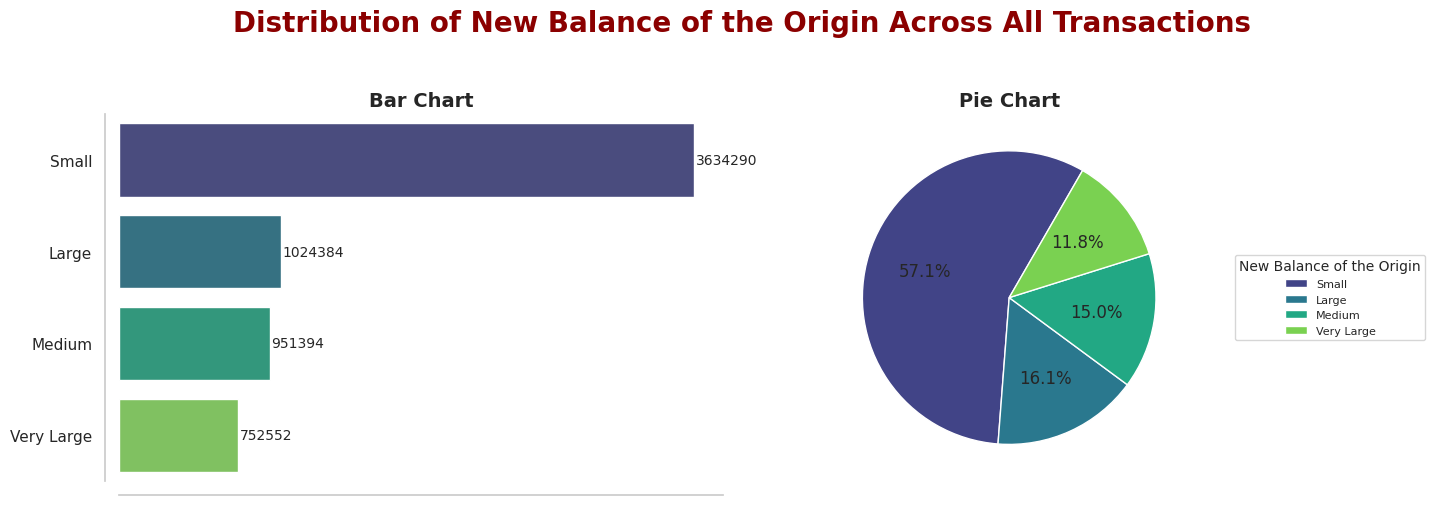

In [ ]:
data_newbalanceorg_type = data['categorize_newbalanceOrig'].value_counts().reset_index()
data_newbalanceorg_type.columns = ['category','frequency']
data_newbalanceorg_type['percentages'] = data_newbalanceorg_type['frequency']/data_newbalanceorg_type['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of New Balance of the Origin Across All Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(data_newbalanceorg_type))
ax1 = sns.barplot(data=data_newbalanceorg_type, y='category', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Category", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(data_newbalanceorg_type))
axes[1].pie(data_newbalanceorg_type['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='New Balance of the Origin',
    labels=data_newbalanceorg_type['category'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of New Balance of the Origin Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Small new balances** dominate, accounting for **57.1%** of all transactions (**3,634,290**).

2. **Large new balances** are the second most common, representing **16.1%** of transactions (**1,024,384**).

3. **Medium new balances** contribute **15.0%** of transactions (**951,394**).

4. **Very large new balances** make up **11.8%** of transactions (**752,552**).

5. The distribution emphasizes a strong concentration of small new balances, with fewer transactions involving large or very large balances.

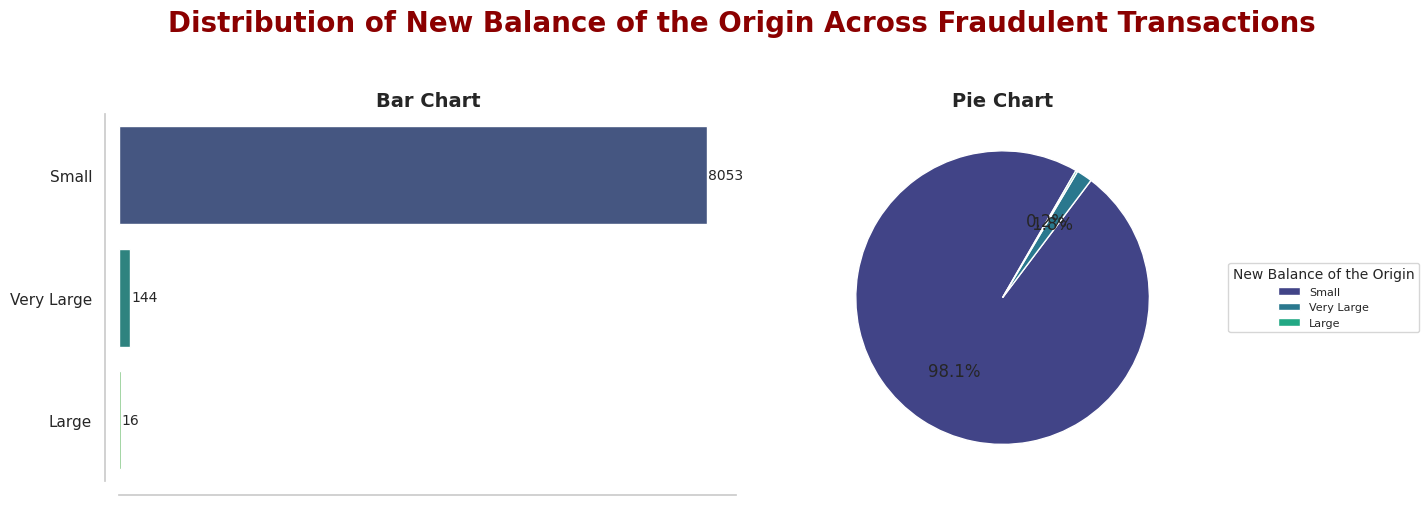

In [ ]:
fraud_data_newbalanceorg_type = fraud_data['categorize_newbalanceOrig'].value_counts().reset_index()
fraud_data_newbalanceorg_type.columns = ['category','frequency']
fraud_data_newbalanceorg_type['percentages'] = fraud_data_newbalanceorg_type['frequency']/fraud_data_newbalanceorg_type['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of New Balance of the Origin Across Fraudulent Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(fraud_data_newbalanceorg_type))
ax1 = sns.barplot(data=fraud_data_newbalanceorg_type, y='category', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Category", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(data_amount_type))
axes[1].pie(fraud_data_newbalanceorg_type['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='New Balance of the Origin',
    labels=fraud_data_newbalanceorg_type['category'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of New Balance of the Origin Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Small new balances** overwhelmingly dominate fraudulent transactions, accounting for **98.1%** of the total (**8,053**).

2. **Very large new balances** contribute **1.8%** of fraudulent transactions (**144**).

3. **Large new balances** are extremely rare, making up only **0.2%** of fraudulent transactions (**16**).

4. The data suggests that most fraudulent transactions leave minimal new balances in the origin account, with very few involving substantial balances.

#### Feature `oldbalanceDest`

This feature represents the initial balance or amount of money in the recipient's account before funds or transfers are received from a transaction. In the context of financial transactions, `oldbalanceDest` is the balance of the recipient's account before the transferred amount of money enters that account. This feature is crucial for tracking balance changes upon receiving funds or transfers.

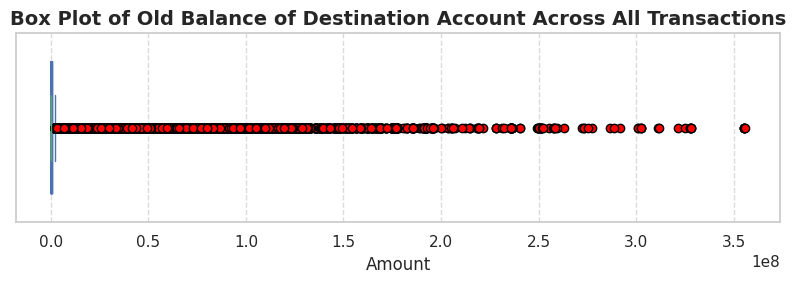

In [ ]:
plt.figure(figsize=(8, 3))
data['oldbalanceDest'].plot(kind='box', patch_artist=True, notch=True,
                    vert=False, widths=0.7, flierprops=dict(
                        markerfacecolor='red', marker='o'))

plt.title('Box Plot of Old Balance of Destination Account Across All Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()
plt.savefig('Box Plot of Old Balance of Destination Account Across All Transactions', dpi=300, bbox_inches='tight')
plt.show()

1. **Small new balances** overwhelmingly dominate fraudulent transactions, accounting for **98.1%** of the total (**8,053**).

2. **Very large new balances** contribute **1.8%** of fraudulent transactions (**144**).

3. **Large new balances** are extremely rare, making up only **0.2%** of fraudulent transactions (**16**).

4. The data suggests that most fraudulent transactions leave minimal new balances in the origin account, with very few involving substantial balances.

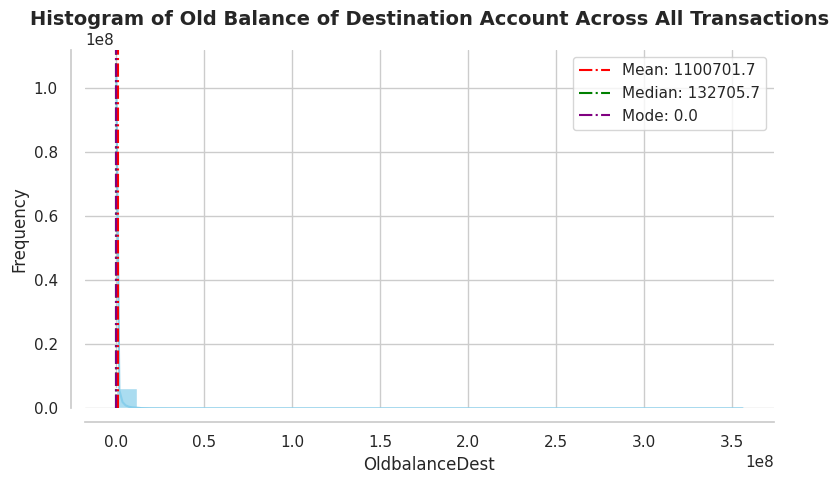

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='oldbalanceDest', kde=True, bins=30, color='skyblue', alpha=0.7)

mean = data["oldbalanceDest"].mean()
median = data["oldbalanceDest"].median()
mode = data["oldbalanceDest"].mode()[0]

plt.axvline(mean, color='red', linestyle='-.', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.1f}')
plt.axvline(mode, color='purple', linestyle='-.', label=f'Mode: {mode:.1f}')

plt.xlabel('OldbalanceDest', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Old Balance of Destination Account Across All Transactions', fontsize=14, fontweight='bold')
plt.legend()

sns.despine(offset= 10)
plt.tight_layout()
plt.savefig('Histogram of Old Balance of Destination Account Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. The **mean old balance** for destination accounts is **1,100,701.7**, significantly influenced by high-value outliers.

2. The **median balance** is **132,705.7**, indicating that most transactions involve relatively low old balances.

3. The **mode is 0.0**, showing that many destination accounts had no initial balance before transactions.

4. The histogram shows a sharp concentration near zero, with a long tail created by a few high-value old balances.

5. The data highlights a heavily skewed distribution, where most accounts have minimal balances while outliers significantly affect the mean.

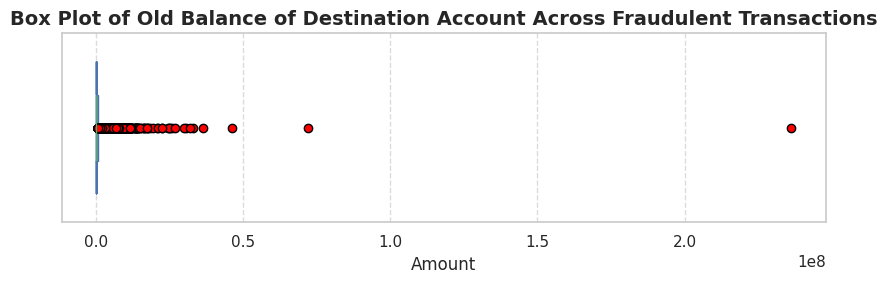

In [ ]:
plt.figure(figsize=(8, 3))
fraud_data['oldbalanceDest'].plot(kind='box', patch_artist=True, notch=True,
                    vert=False, widths=0.7, flierprops=dict(
                        markerfacecolor='red', marker='o'))

plt.title('Box Plot of Old Balance of Destination Account Across Fraudulent Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()
plt.savefig('Box Plot of Old Balance of Destination Account Across Fraudulent Transactions', dpi=300, bbox_inches='tight')
plt.show()

1. Most fraudulent transactions involve destination accounts with low old balances, as indicated by the compact box.

2. Significant outliers are present, with old balances reaching up to **2e8 (200 million)**.

3. The distribution is heavily skewed, with a small number of high-value old balances creating a long tail.

4. The interquartile range (IQR) suggests that most destination accounts in fraudulent transactions have minimal old balances, while outliers significantly extend the range.

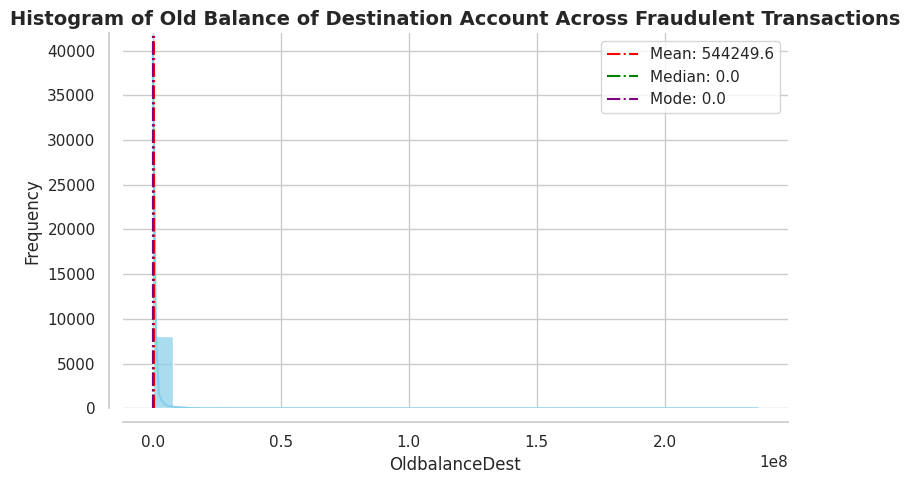

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=fraud_data, x='oldbalanceDest', kde=True, bins=30, color='skyblue', alpha=0.7)

mean = fraud_data["oldbalanceDest"].mean()
median = fraud_data["oldbalanceDest"].median()
mode = fraud_data["oldbalanceDest"].mode()[0]

plt.axvline(mean, color='red', linestyle='-.', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.1f}')
plt.axvline(mode, color='purple', linestyle='-.', label=f'Mode: {mode:.1f}')

plt.xlabel('OldbalanceDest', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Old Balance of Destination Account Across Fraudulent Transactions', fontsize=14, fontweight='bold')
plt.legend()

sns.despine(offset= 10)
plt.tight_layout()
plt.savefig('Histogram of Old Balance of Destination Account Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. The **mean old balance** for destination accounts in fraudulent transactions is **544,249.6**, influenced by high-value outliers.

2. Both the **median and mode** are **0.0**, indicating that most destination accounts had no initial balance before fraudulent transactions.

3. The histogram shows a sharp concentration near zero, with very few accounts having higher old balances.

4. A small number of high-value outliers create a long tail, significantly skewing the overall distribution.

In [ ]:
data['categorize_oldbalancedest'] = data['oldbalanceDest'].map(category)
fraud_data['categorize_oldbalancedest'] = fraud_data['oldbalanceDest'].map(category)

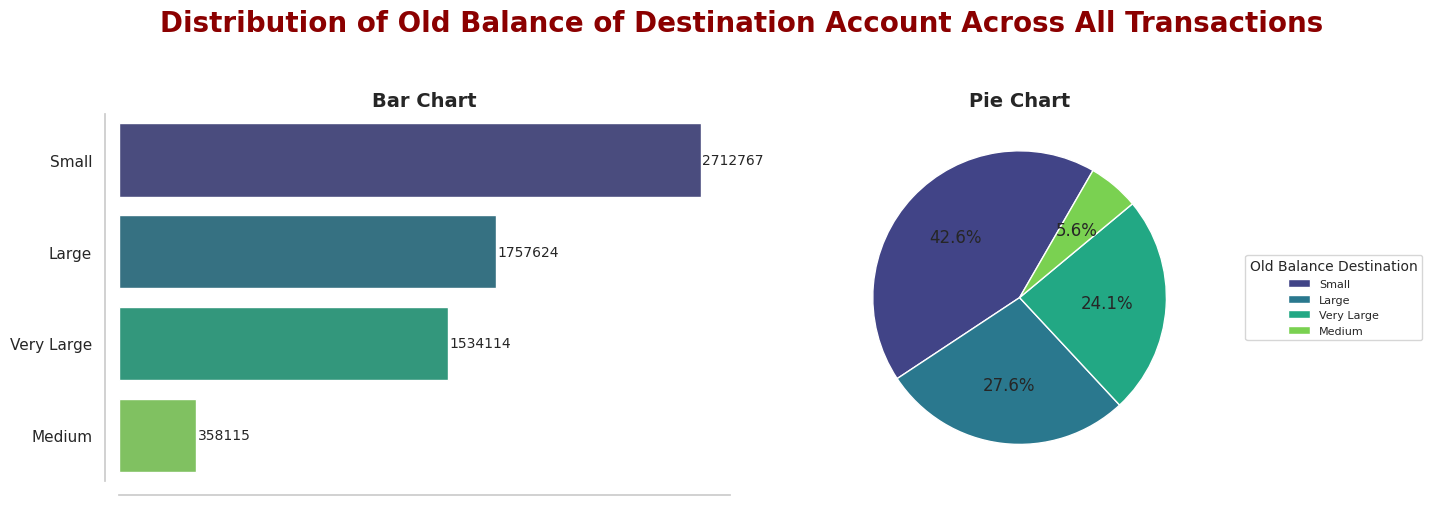

In [ ]:
data_oldbalancedest_type = data['categorize_oldbalancedest'].value_counts().reset_index()
data_oldbalancedest_type.columns = ['category','frequency']
data_oldbalancedest_type['percentages'] = data_oldbalancedest_type['frequency']/data_oldbalancedest_type['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of Old Balance of Destination Account Across All Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(data_oldbalancedest_type))
ax1 = sns.barplot(data=data_oldbalancedest_type, y='category', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Category", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(data_oldbalancedest_type))
axes[1].pie(data_oldbalancedest_type['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='Old Balance Destination',
    labels=data_oldbalancedest_type['category'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of Old Balance of Destination Account Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Small old balances** dominate, accounting for **42.6%** of all transactions (**2,712,767**).

2. **Large old balances** contribute **27.6%** of transactions (**1,757,624**).

3. **Very large old balances** represent **24.1%** of transactions (**1,534,114**).

4. **Medium old balances** are the least frequent, making up **5.6%** of transactions (**358,115**).

5. The data highlights a strong concentration of small and large old balances, with medium balances being relatively rare.

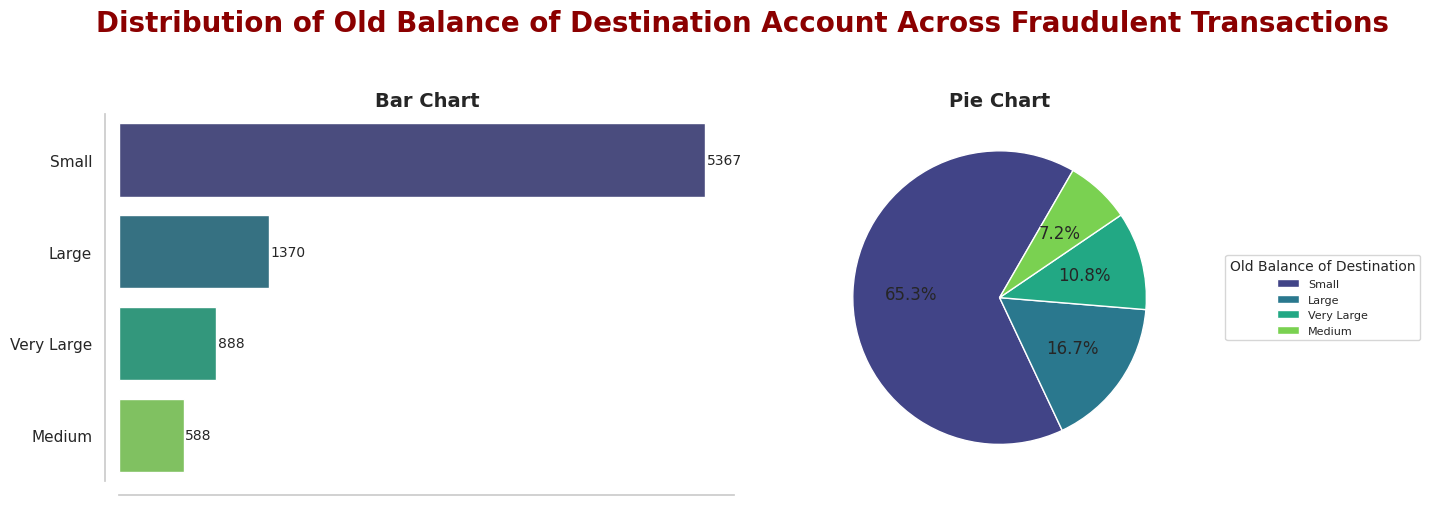

In [ ]:
fraud_data_oldbalancedest_type = fraud_data['categorize_oldbalancedest'].value_counts().reset_index()
fraud_data_oldbalancedest_type.columns = ['category','frequency']
fraud_data_oldbalancedest_type['percentages'] = fraud_data_oldbalancedest_type['frequency']/fraud_data_oldbalancedest_type['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of Old Balance of Destination Account Across Fraudulent Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(fraud_data_oldbalancedest_type))
ax1 = sns.barplot(data=fraud_data_oldbalancedest_type, y='category', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Category", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(fraud_data_oldbalancedest_type))
axes[1].pie(fraud_data_oldbalancedest_type['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='Old Balance of Destination',
    labels=fraud_data_oldbalancedest_type['category'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of Old Balance of Destination Account Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

From the information above, it can be concluded that fraudulent accounts mostly fall into the Small category. This indicates that fraudsters create specific accounts (cards) to store money transferred from fraudulent activities.

#### Feature `newbalanceDest`

This feature indicates the new balance in the recipient's account. It represents the amount of money remaining in the recipient's account after funds or transfers from a transaction have been processed. This feature is crucial for tracking balance changes after funds or transfers have been processed and ensuring the integrity of financial transactions.

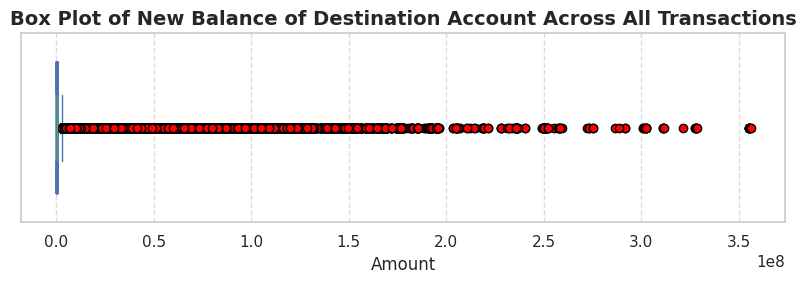

In [ ]:
plt.figure(figsize=(8, 3))
data['newbalanceDest'].plot(kind='box', patch_artist=True, notch=True,
                    vert=False, widths=0.7, flierprops=dict(
                        markerfacecolor='red', marker='o'))

plt.title('Box Plot of New Balance of Destination Account Across All Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()
plt.savefig('Box Plot of New Balance of Destination Account Across All Transactions', dpi=300, bbox_inches='tight')
plt.show()

1. Most new balances for destination accounts are concentrated near the lower end, as indicated by the compact box.

2. Significant outliers are present, with new balances reaching up to **3.5e8 (350 million)**.

3. The distribution is heavily skewed, with a small number of high-value new balances creating a long tail.

4. The interquartile range (IQR) highlights that most transactions result in relatively low new balances for destination accounts, while outliers extend far beyond the upper whisker.

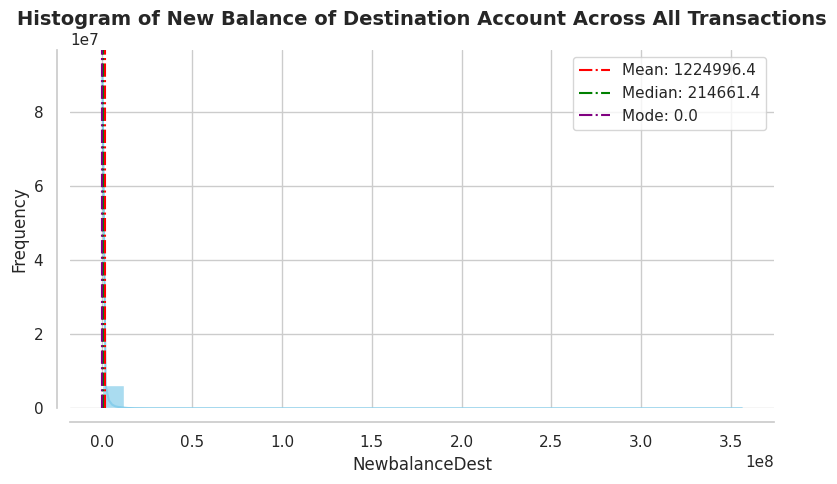

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='newbalanceDest', kde=True, bins=30, color='skyblue', alpha=0.7)

mean = data["newbalanceDest"].mean()
median = data["newbalanceDest"].median()
mode = data["newbalanceDest"].mode()[0]

plt.axvline(mean, color='red', linestyle='-.', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.1f}')
plt.axvline(mode, color='purple', linestyle='-.', label=f'Mode: {mode:.1f}')

plt.xlabel('NewbalanceDest', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of New Balance of Destination Account Across All Transactions', fontsize=14, fontweight='bold')
plt.legend()

sns.despine(offset= 10)
plt.tight_layout()
plt.savefig('Histogram of New Balance of Destination Account Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. The **mean new balance** for destination accounts is **1,224,996.4**, significantly influenced by high-value outliers.

2. The **median new balance** is **214,661.4**, much lower than the mean, indicating a skewed distribution.

3. The **mode is 0.0**, showing that many destination accounts had no new balance after transactions.

4. The histogram shows a steep concentration near zero, with a long tail created by a small number of high-value new balances.

5. The data highlights a heavily skewed distribution where most accounts have relatively low new balances, while outliers significantly increase the mean.

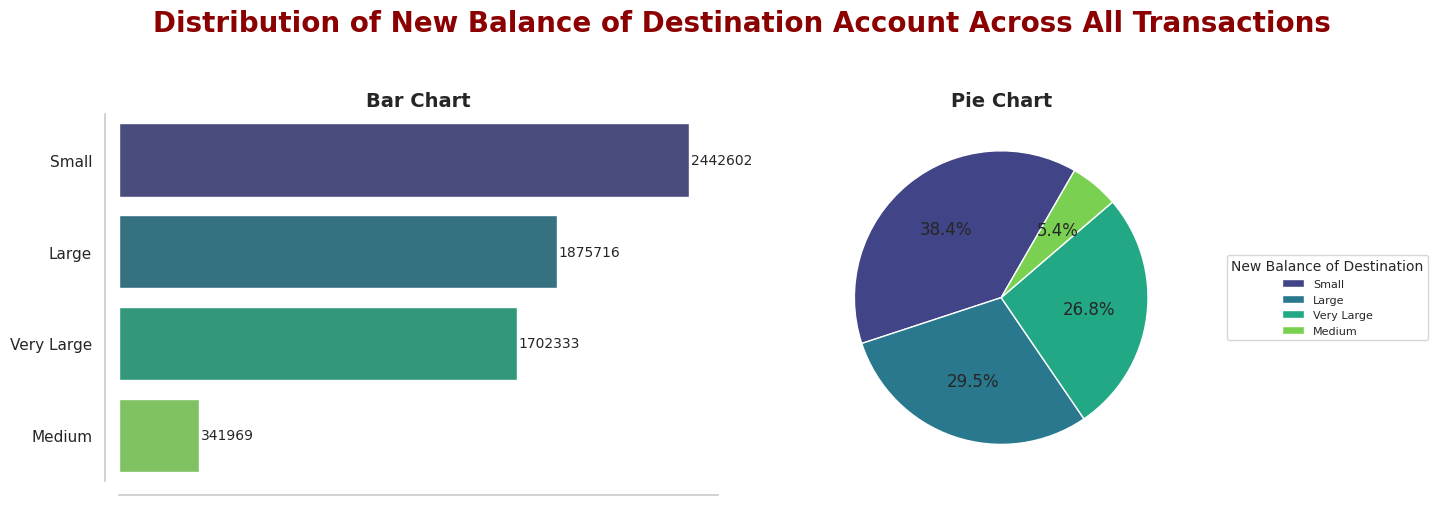

In [ ]:
data['categorize_newbalanceDest'] = data['newbalanceDest'].map(category)
fraud_data['categorize_newbalanceDest'] = fraud_data['newbalanceDest'].map(category)

data_newbalancedest_type = data['categorize_newbalanceDest'].value_counts().reset_index()
data_newbalancedest_type.columns = ['category','frequency']
data_newbalancedest_type['percentages'] = data_newbalancedest_type['frequency']/data_newbalancedest_type['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of New Balance of Destination Account Across All Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(data_newbalancedest_type))
ax1 = sns.barplot(data=data_newbalancedest_type, y='category', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Category", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(data_newbalancedest_type))
axes[1].pie(data_newbalancedest_type['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='New Balance of Destination',
    labels=data_newbalancedest_type['category'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of New Balance of Destination Account Across All Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Small new balances** dominate, accounting for **38.4%** of all transactions (**2,442,602**).

2. **Large new balances** represent **29.5%** of transactions (**1,875,716**).

3. **Very large new balances** contribute **26.8%** of transactions (**1,702,333**).

4. **Medium new balances** are the least frequent, making up **5.4%** of transactions (**341,969**).

5. The data suggests that most destination accounts end with small or large new balances, while medium balances are relatively rare.

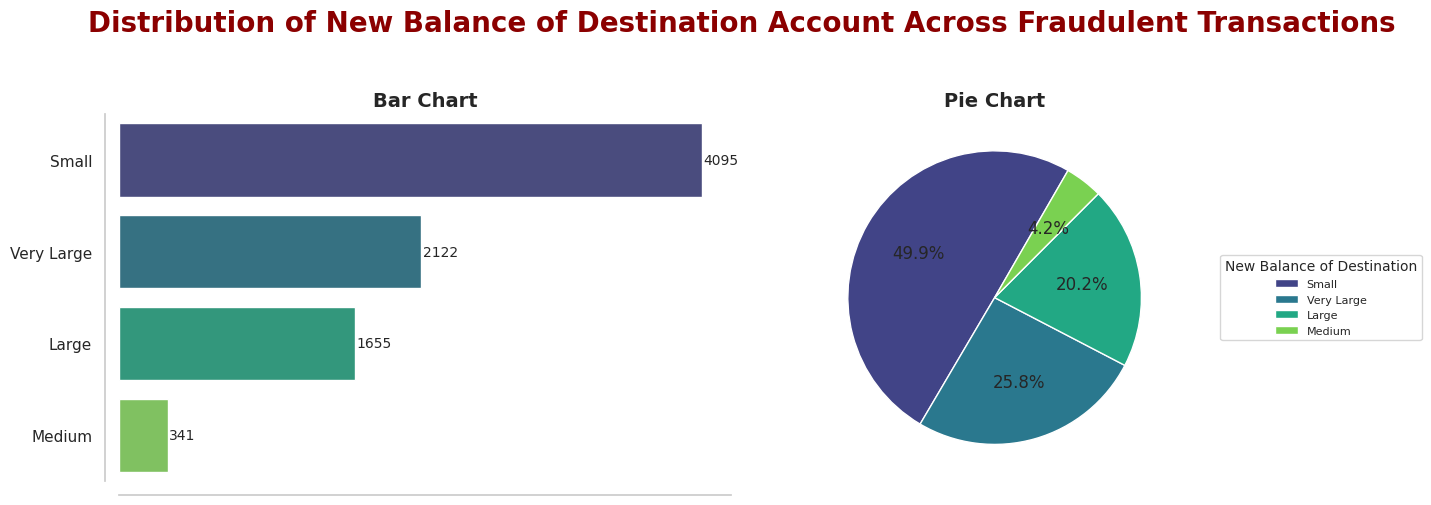

In [ ]:
fraud_data_newbalancedest_type = fraud_data['categorize_newbalanceDest'].value_counts().reset_index()
fraud_data_newbalancedest_type.columns = ['category','frequency']
fraud_data_newbalancedest_type['percentages'] = fraud_data_newbalancedest_type['frequency']/fraud_data_newbalancedest_type['frequency'].sum()*100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of New Balance of Destination Account Across Fraudulent Transactions", fontsize=20, color='darkred', fontweight='bold')

sns.set_theme(style='whitegrid')
palette = sns.color_palette("viridis", len(fraud_data_newbalancedest_type))
ax1 = sns.barplot(data=fraud_data_newbalancedest_type, y='category', x='frequency', palette=palette, ax=axes[0])

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", fontsize=10, padding=1)

axes[0].set_title("Bar Chart", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Category", fontsize=12)
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("")
sns.despine(offset=10, ax=axes[0])

# Piechart
color = sns.color_palette("viridis", len(fraud_data_newbalancedest_type))
axes[1].pie(fraud_data_newbalancedest_type['percentages'], labels = None, autopct="%1.1f%%", startangle=60, colors=color)
axes[1].set_title("Pie Chart", fontsize=14, fontweight='bold')
axes[1].legend(
    title='New Balance of Destination',
    labels=fraud_data_newbalancedest_type['category'],
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=8,
    title_fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(top=0.77)
plt.savefig('Distribution of New Balance of Destination Account Across Fraudulent Transactions.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Small new balances** dominate fraudulent transactions, accounting for **49.9%** of the total (**4,095**).

2. **Very large new balances** represent **25.8%** of fraudulent transactions (**2,122**).

3. **Large new balances** contribute **20.2%** of fraudulent transactions (**1,655**).

4. **Medium new balances** are the least frequent, making up **4.2%** of fraudulent transactions (**341**).

5. The data indicates that fraudulent transactions are mostly associated with small or very large new balances, with medium balances being relatively uncommon.

### b. Bivariate Analysis

##### Numerical vs Numerical

In [ ]:
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
categorical_features = data.select_dtypes(include='O').columns

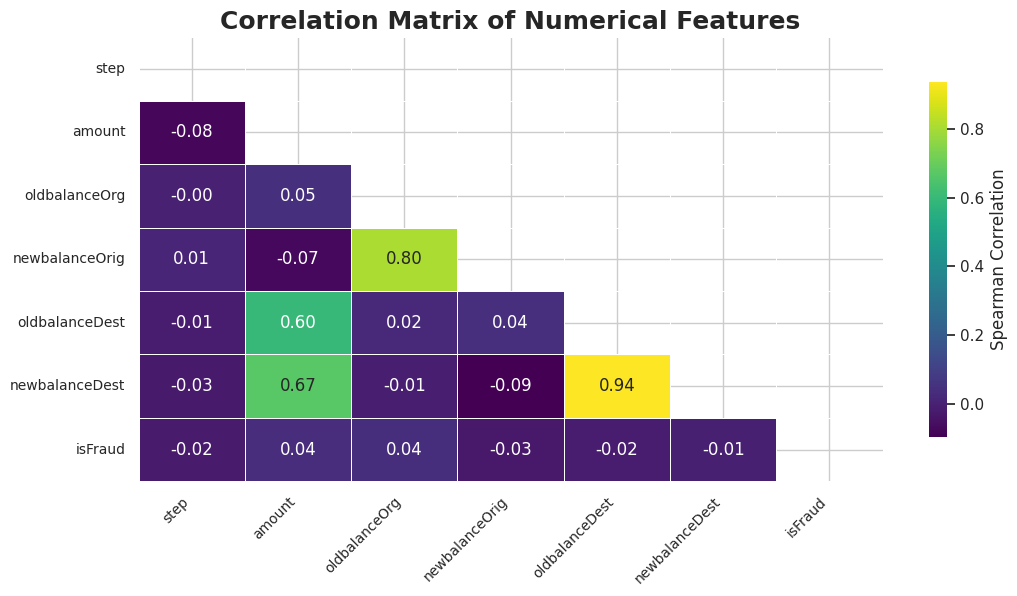

In [ ]:
correlation_matrix = data[numerical_features].corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 6))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='viridis',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Spearman Correlation"}
)

plt.title("Correlation Matrix of Numerical Features", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.subplots_adjust(top=0.85)
plt.savefig('Correlation Matrix of Numerical Features.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Strong positive correlation**:
   - `newbalanceDest` and `oldbalanceDest` have the highest correlation (**0.94**), indicating that destination balances are highly interdependent.

2. **Moderate positive correlation**:
   - `newbalanceOrig` and `oldbalanceOrg` show a correlation of **0.80**, suggesting a relationship between original balances before and after transactions.
   - `amount` is moderately correlated with `oldbalanceDest` (**0.60**) and `newbalanceDest` (**0.67**), indicating that the transaction amount affects destination balances.

3. **Weak correlation with `isFraud`**:
   - All variables (`amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`) show a weak correlation with `isFraud`, indicating that these features alone may not strongly predict fraud.

4. **Negligible correlation**:
   - `step` has little to no correlation with other variables, suggesting that the transaction time (step) is not a significant factor.

5. **Insights**:
   - Features like balances (`oldbalanceDest`, `newbalanceDest`, `oldbalanceOrg`, `newbalanceOrig`) and `amount` may still be important when combined in a predictive model despite their weak individual correlation with `isFraud`.

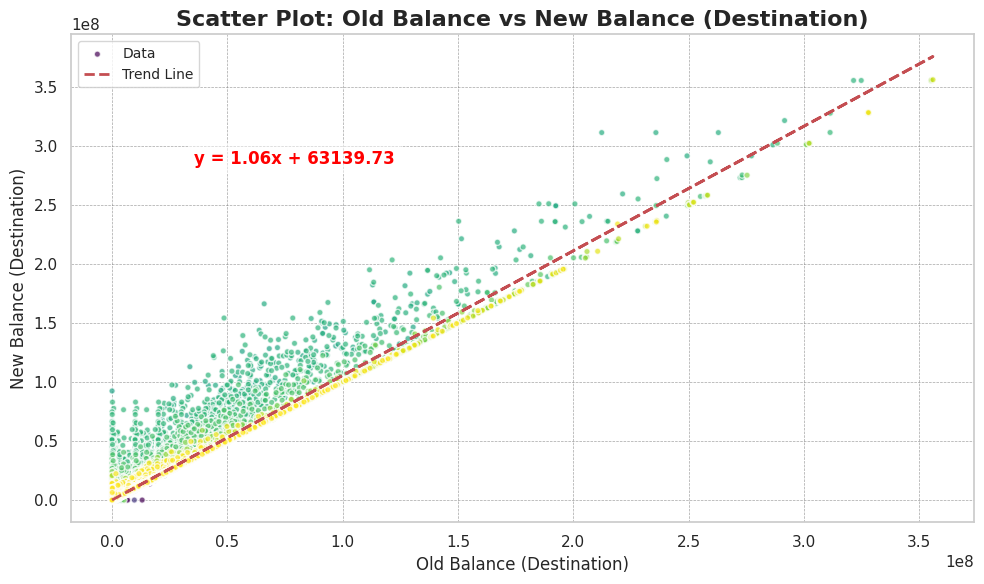

In [ ]:
from matplotlib import cm

x = data['oldbalanceDest']
y = data['newbalanceDest']

plt.figure(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(x)))
plt.scatter(x, y, label='Data', alpha=0.7, c=colors, s=20, cmap='viridis', edgecolor='w')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label='Trend Line', linewidth=2)

m = z[0]
c = z[1]
equation = f'y = {m:.2f}x + {c:.2f}'

plt.text(
    x.min() + 0.1 * (x.max() - x.min()),
    y.min() + 0.8 * (y.max() - y.min()),
    equation, fontsize=12, color='red', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5)
)

plt.title("Scatter Plot: Old Balance vs New Balance (Destination)", fontsize=16, fontweight='bold')
plt.xlabel("Old Balance (Destination)", fontsize=12)
plt.ylabel("New Balance (Destination)", fontsize=12)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig("Scatter Plot: Old Balance vs New Balance (Destination).png", dpi=300, bbox_inches='tight')

plt.show()

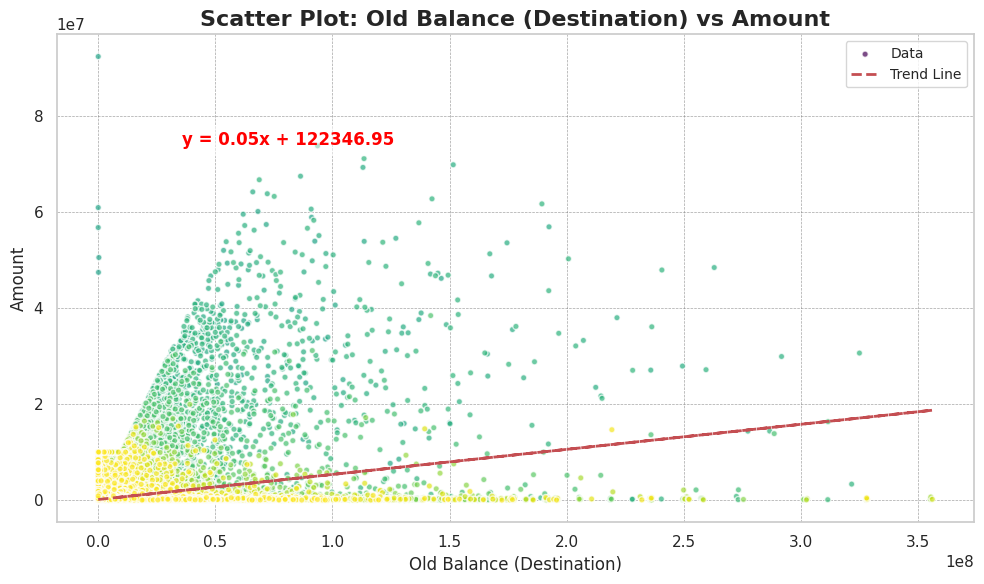

In [ ]:
x = data['oldbalanceDest']
y = data['amount']

plt.figure(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(x)))
plt.scatter(x, y, label='Data', alpha=0.7, c=colors, s=20, cmap='viridis', edgecolor='w')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label='Trend Line', linewidth=2)

m = z[0]
c = z[1]
equation = f'y = {m:.2f}x + {c:.2f}'

plt.text(
    x.min() + 0.1 * (x.max() - x.min()),
    y.min() + 0.8 * (y.max() - y.min()),
    equation, fontsize=12, color='red', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5)
)

plt.title("Scatter Plot: Old Balance (Destination) vs Amount", fontsize=16, fontweight='bold')
plt.xlabel("Old Balance (Destination)", fontsize=12)
plt.ylabel("Amount", fontsize=12)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig("Scatter Plot: Old Balance (Destination) vs Amount.png", dpi=300, bbox_inches='tight')

plt.show()

1. **Linear Relationship**:
   - A strong positive linear correlation exists between **Old Balance (Destination)** and **Transaction Amount**, indicated by the trend line equation: `y = 0.99x - 9748.21`.
   - The slope of `0.99` suggests that for every unit increase in old balance, the transaction amount increases by almost the same amount.

2. **Trend Line Analysis**:
   - The y-intercept of `-9748.21` implies that small discrepancies may exist for lower balance values, potentially due to fees or adjustments.

3. **Data Patterns**:
   - Most data points align closely with the trend line, reinforcing the proportional relationship.
   - Outliers above and below the trend line represent deviations, which could indicate unusual transactions or errors.

4. **Implications**:
   - The correlation supports using old balance as a predictive feature for transaction amount in models.
   - Further investigation into deviations from the trend can help identify potential anomalies or fraudulent activity.

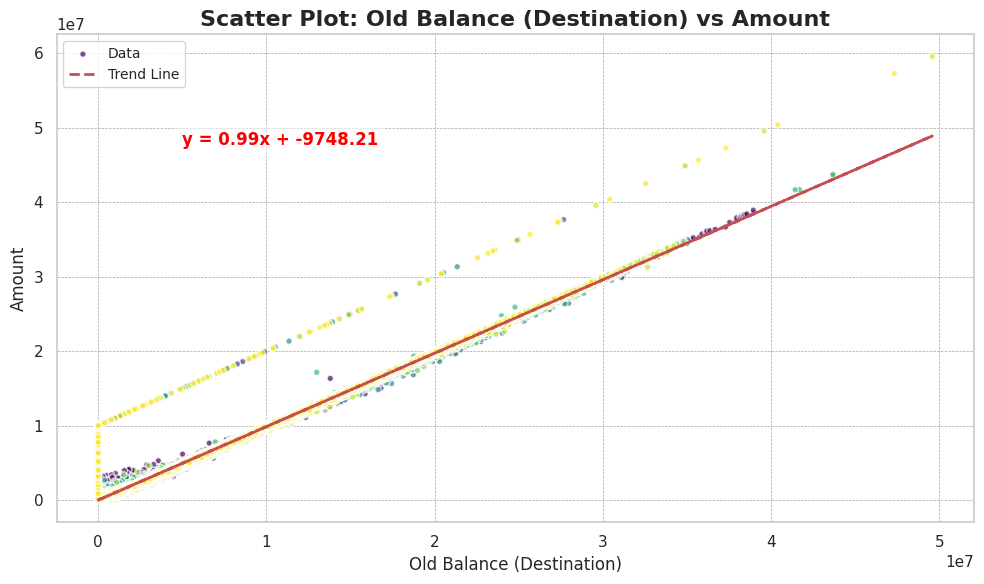

In [ ]:
x = data['newbalanceOrig']
y = data['oldbalanceOrg']

plt.figure(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(x)))
plt.scatter(x, y, label='Data', alpha=0.7, c=colors, s=20, cmap='viridis', edgecolor='w')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label='Trend Line', linewidth=2)

m = z[0]
c = z[1]
equation = f'y = {m:.2f}x + {c:.2f}'

plt.text(
    x.min() + 0.1 * (x.max() - x.min()),
    y.min() + 0.8 * (y.max() - y.min()),
    equation, fontsize=12, color='red', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5)
)

plt.title("Scatter Plot: Old Balance (Destination) vs Amount", fontsize=16, fontweight='bold')
plt.xlabel("Old Balance (Destination)", fontsize=12)
plt.ylabel("Amount", fontsize=12)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig("Scatter Plot: vs Old Balance (Destination).png", dpi=300, bbox_inches='tight')

plt.show()

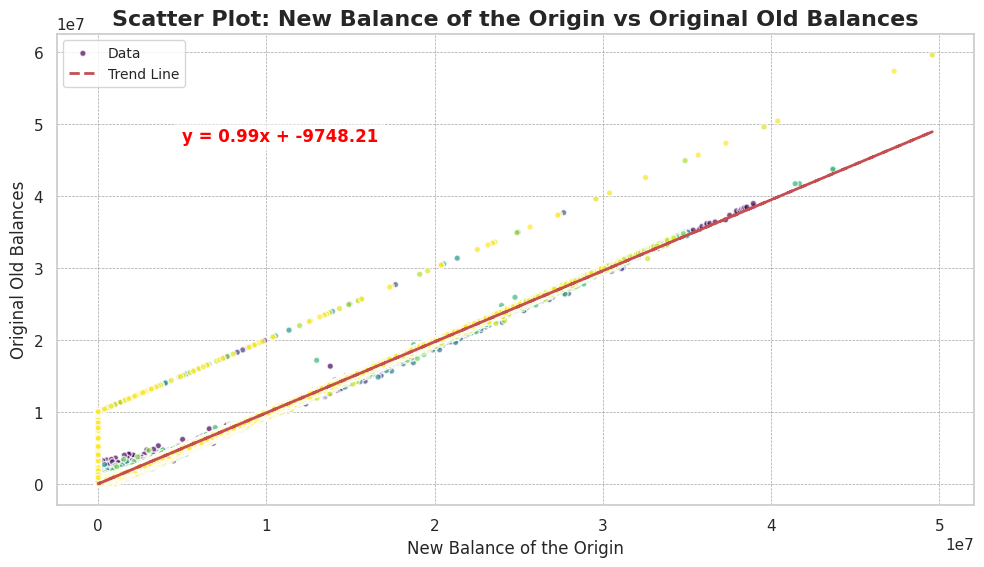

In [ ]:
x = data['newbalanceOrig']
y = data['oldbalanceOrg']

plt.figure(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(x)))
plt.scatter(x, y, label='Data', alpha=0.7, c=colors, s=20, cmap='viridis', edgecolor='w')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label='Trend Line', linewidth=2)

m = z[0]
c = z[1]
equation = f'y = {m:.2f}x + {c:.2f}'

plt.text(
    x.min() + 0.1 * (x.max() - x.min()),
    y.min() + 0.8 * (y.max() - y.min()),
    equation, fontsize=12, color='red', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5)
)

plt.title("Scatter Plot: New Balance of the Origin vs Original Old Balances", fontsize=16, fontweight='bold')
plt.xlabel("New Balance of the Origin", fontsize=12)
plt.ylabel("Original Old Balances", fontsize=12)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig("Scatter Plot: New Balance of the Origin vs Original Old Balances.png", dpi=300, bbox_inches='tight')

plt.show()

##### Numerical vs Categorical

In [ ]:
numerical_features

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud']

In [ ]:
categorical_features

Index(['type', 'categorize_time', 'categorize_amount',
       'categorize_oldbalancOrg', 'categorize_newbalanceOrig',
       'categorize_oldbalancedest', 'categorize_newbalanceDest'],
      dtype='object')

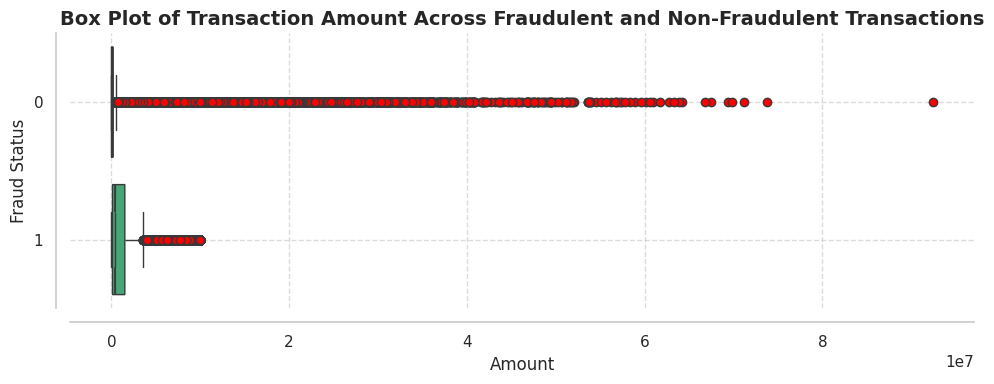

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(
    data=data,
    x='amount',
    y='isFraud',
    palette='viridis',
    notch=True,
    orient='h',
    flierprops=dict(markerfacecolor='red', marker='o')
)

sns.despine(offset=10)

plt.title('Box Plot of Transaction Amount Across Fraudulent and Non-Fraudulent Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Fraud Status', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Box_Plot_Transaction_Amount_Fraud_Status.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Fraudulent transactions**:
   - Transaction amounts for fraud cases (Fraud Status = 1) are generally concentrated within a smaller range.
   - A few high-value outliers are present but are less frequent compared to non-fraudulent transactions.

2. **Non-fraudulent transactions**:
   - Transaction amounts for non-fraud cases (Fraud Status = 0) are spread across a much wider range.
   - Significant high-value outliers are observed, indicating variability in transaction amounts.

3. **Insights**:
   - Fraudulent transactions tend to have a more consistent transaction amount range compared to non-fraudulent ones, which exhibit greater variability.
   - High-value transactions are not necessarily indicative of fraud, as similar values occur in both fraudulent and non-fraudulent cases.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False, sharex=False)
fig.suptitle("Histogram of Transaction Amount for Fraudulent and Non-Fraudulent Transactions",
             fontsize=16, fontweight='bold', color='darkred')

sns.histplot(
    data=data[data['isFraud'] == 0],
    x='amount',
    bins=50,
    kde=True,
    color='blue',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title("Non-Fraudulent Transactions", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Transaction Amount", fontsize=10)
axes[0].set_ylabel("Count", fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.histplot(
    data=data[data['isFraud'] == 1],
    x='amount',
    bins=50,
    kde=True,
    color='red',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title("Fraudulent Transactions", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Transaction Amount", fontsize=10)
axes[1].set_ylabel("")
axes[1].grid(True, linestyle='--', alpha=0.7)

sns.despine(offset=10)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig("Histogram_Split_Transaction_Amount_Fraud_Status.png", dpi=300, bbox_inches='tight')
plt.show()

1. **Non-Fraudulent Transactions**:
   - Transaction amounts are distributed across a wide range, with a heavy concentration near smaller values.
   - A few high-value transactions act as outliers, but they are relatively infrequent.

2. **Fraudulent Transactions**:
   - Most fraudulent transactions occur with lower transaction amounts, as shown by the sharp peak near zero.
   - The distribution tapers off quickly as the transaction amounts increase, with only a small number of high-value fraudulent transactions.

3. **Comparison**:
   - Non-fraudulent transactions exhibit more variability in transaction amounts compared to fraudulent ones.
   - Fraudulent transactions are more concentrated in the lower range, with fewer high-value instances compared to non-fraudulent cases.

4. **Insights**:
   - Fraudulent transactions typically involve smaller amounts, while non-fraudulent transactions have a broader range of transaction amounts, including high values.

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(
    data=data,
    x='step',
    y='isFraud',
    palette='viridis',
    notch=True,
    orient='h',
    flierprops=dict(markerfacecolor='red', marker='o')
)

sns.despine(offset=10)

plt.title('Box Plot of Step Across Fraudulent and Non-Fraudulent Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Step', fontsize=12)
plt.ylabel('Fraud Status', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Box_Plot_Step_Fraud_Status.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Non-Fraudulent Transactions**:
   - The transaction steps are widely distributed, with a median near the middle of the range.
   - There are a few outliers in the early steps.

2. **Fraudulent Transactions**:
   - Fraudulent transactions show a slightly narrower range compared to non-fraudulent ones.
   - The median step for fraudulent transactions is similar to non-fraudulent transactions, indicating no significant difference in timing.

3. **Insights**:
   - The timing of transactions (step) does not appear to be a distinguishing factor between fraudulent and non-fraudulent transactions.
   - Both types of transactions are evenly distributed across the steps, suggesting that fraud occurs consistently throughout the timeframe.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False, sharex=False)
fig.suptitle("Histogram of Step for Fraudulent and Non-Fraudulent Transactions",
             fontsize=16, fontweight='bold', color='darkred')

sns.histplot(
    data=data[data['isFraud'] == 0],
    x='step',
    bins=50,
    kde=True,
    color='blue',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title("Non-Fraudulent Transactions", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Step", fontsize=10)
axes[0].set_ylabel("Count", fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.histplot(
    data=data[data['isFraud'] == 1],
    x='step',
    bins=50,
    kde=True,
    color='red',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title("Fraudulent Transactions", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Step", fontsize=10)
axes[1].set_ylabel("")
axes[1].grid(True, linestyle='--', alpha=0.7)

sns.despine(offset=10)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig("Histogram_of_Step_Fraud_Status.png", dpi=300, bbox_inches='tight')
plt.show()

1. **Non-Fraudulent Transactions**:
   - Transactions are unevenly distributed across steps, showing a cyclical pattern with spikes at regular intervals.
   - The highest transaction counts occur during specific steps, indicating periodic activity.

2. **Fraudulent Transactions**:
   - Fraudulent transactions are more evenly distributed across all steps, without significant spikes.
   - The transaction count remains relatively stable throughout the range of steps.

3. **Comparison**:
   - Non-fraudulent transactions exhibit periodicity, suggesting scheduled or batch processing behavior.
   - Fraudulent transactions lack periodic patterns and are uniformly distributed, indicating randomness in their occurrence.

4. **Insights**:
   - The lack of periodicity in fraudulent transactions may serve as a distinguishing feature from non-fraudulent transactions.
   - Monitoring for irregular patterns in step distribution could help in identifying potential fraud.

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(
    data=data,
    x='oldbalanceOrg',
    y='isFraud',
    palette='viridis',
    notch=True,
    orient='h',
    flierprops=dict(markerfacecolor='red', marker='o')
)

sns.despine(offset=10)

plt.title('Box Plot of Original Old Balance Across Fraudulent and Non-Fraudulent Transactions', fontsize=14, fontweight='bold')
plt.xlabel('Original Old Balance', fontsize=12)
plt.ylabel('Fraud Status', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Box_Plot_Original_Old_Balance_Fraud_Status.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Non-Fraudulent Transactions**:
   - Original old balances are widely distributed, with numerous high-value outliers reaching up to **6e7 (60 million)**.
   - The interquartile range (IQR) is relatively large, indicating variability in balances before transactions.

2. **Fraudulent Transactions**:
   - Original old balances are more concentrated within a smaller range compared to non-fraudulent transactions.
   - Outliers are present but less frequent than in non-fraudulent transactions, with values extending up to **6e7 (60 million)**.

3. **Comparison**:
   - Fraudulent transactions tend to have lower original old balances overall, with less variability compared to non-fraudulent transactions.
   - The presence of outliers in both cases suggests that high original balances alone are not indicative of fraud.

4. **Insights**:
   - Monitoring the distribution of original old balances, especially for transactions with lower variability, might help in distinguishing fraudulent patterns.


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False, sharex=False)
fig.suptitle("Histogram of Original Old Balance for Fraudulent and Non-Fraudulent Transactions",
             fontsize=16, fontweight='bold', color='darkred')

sns.histplot(
    data=data[data['isFraud'] == 0],
    x='oldbalanceOrg',
    bins=50,
    kde=True,
    color='blue',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title("Non-Fraudulent Transactions", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Original Old Balance", fontsize=10)
axes[0].set_ylabel("Count", fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.histplot(
    data=data[data['isFraud'] == 1],
    x='oldbalanceOrg',
    bins=50,
    kde=True,
    color='red',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title("Fraudulent Transactions", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Original Old Balance", fontsize=10)
axes[1].set_ylabel("")
axes[1].grid(True, linestyle='--', alpha=0.7)

sns.despine(offset=10)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig("Histogram_of_Original_Old_Balance_Fraud_Status.png", dpi=300, bbox_inches='tight')
plt.show()

1. **Non-Fraudulent Transactions**:
   - The original old balances are heavily concentrated near zero, with a long tail extending to high values.
   - A significant number of transactions involve accounts with zero or minimal old balances.

2. **Fraudulent Transactions**:
   - Original old balances are also concentrated near zero but exhibit a sharper decline compared to non-fraudulent transactions.
   - Fewer fraudulent transactions involve high original old balances, resulting in a shorter tail.

3. **Comparison**:
   - Both fraudulent and non-fraudulent transactions show a strong concentration of accounts with low old balances.
   - Non-fraudulent transactions have a broader range of high-value balances, while fraudulent transactions are more restricted to lower values.

4. **Insights**:
   - The distribution of original old balances highlights a key characteristic of fraudulent transactions, with most occurring in accounts with lower balances.
   - High old balances are more common in non-fraudulent transactions, suggesting that balance size alone may help differentiate fraud but is not definitive.

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(
    data=data,
    x='newbalanceOrig',
    y='isFraud',
    palette='viridis',
    notch=True,
    orient='h',
    flierprops=dict(markerfacecolor='red', marker='o')
)

sns.despine(offset=10)

plt.title('Box Plot of New Balance of Origin Across Fraudulent and Non-Fraudulent Transactions', fontsize=14, fontweight='bold')
plt.xlabel('New Balance of Origin', fontsize=12)
plt.ylabel('Fraud Status', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Box_Plot_New_Balance_of_Origin_Fraud_Status.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Non-Fraudulent Transactions**:
   - New balances of origin accounts are distributed widely, with many high-value outliers up to **5e7 (50 million)**.
   - The interquartile range (IQR) is larger, indicating variability in new balances after transactions.

2. **Fraudulent Transactions**:
   - New balances of origin accounts are mostly concentrated around zero, with a few outliers extending to high values.
   - The range of new balances for fraudulent transactions is more constrained compared to non-fraudulent transactions.

3. **Comparison**:
   - Fraudulent transactions are more likely to leave the origin account with a near-zero balance.
   - Non-fraudulent transactions show greater variability, with many instances retaining significant balances post-transaction.

4. **Insights**:
   - The new balance of origin accounts can be a distinguishing feature; fraudulent transactions often deplete the origin account.
   - Monitoring for near-zero new balances after transactions could help identify potential fraudulent activities.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False, sharex=False)
fig.suptitle("Histogram of New Balance of Origin for Fraudulent and Non-Fraudulent Transactions",
             fontsize=16, fontweight='bold', color='darkred')

sns.histplot(
    data=data[data['isFraud'] == 0],
    x='newbalanceOrig',
    bins=50,
    kde=True,
    color='blue',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title("Non-Fraudulent Transactions", fontsize=12, fontweight='bold')
axes[0].set_xlabel("New Balance of Origin", fontsize=10)
axes[0].set_ylabel("Count", fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.histplot(
    data=data[data['isFraud'] == 1],
    x='newbalanceOrig',
    bins=50,
    kde=True,
    color='red',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title("Fraudulent Transactions", fontsize=12, fontweight='bold')
axes[1].set_xlabel("New Balance of Origin", fontsize=10)
axes[1].set_ylabel("")
axes[1].grid(True, linestyle='--', alpha=0.7)

sns.despine(offset=10)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig("Histogram_of_New_Balance_of_Origin_Fraud_Status.png", dpi=300, bbox_inches='tight')
plt.show()

1. **Non-Fraudulent Transactions**:
   - The new balances of origin accounts are highly concentrated near zero, with a significant number of transactions retaining minimal post-transaction balances.
   - A long tail extends to higher values, indicating that many accounts maintain substantial balances after non-fraudulent transactions.

2. **Fraudulent Transactions**:
   - New balances of origin accounts are sharply concentrated near zero, with the majority of transactions depleting the origin account.
   - The distribution is heavily skewed, with very few transactions leaving significant balances.

3. **Comparison**:
   - Fraudulent transactions are characterized by almost all origin accounts having near-zero balances after the transaction.
   - Non-fraudulent transactions show a broader range of new balances, with many accounts retaining larger amounts.

4. **Insights**:
   - The drastic difference in the distribution of new balances highlights a potential red flag for fraud detection: transactions that result in a near-zero balance in the origin account.
   - This feature could be effectively used to build fraud detection models.

##### Categorical vs Categorical

In [ ]:
categorical_features

In [ ]:
plt.figure(figsize=(30,10))

sns.catplot(
    data=data,
    x='type',
    hue='categorize_time',
    kind='count',
    palette='viridis',
    height=5,
    aspect=1.5
)
plt.title("Distribution of Transaction Types by Time Category", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine(offset=10)
plt.subplots_adjust(top=0.8)
plt.show()

1. **Payment Transactions**:
   - Most frequent during the **Morning** and **Afternoon**, with significantly lower activity during **Midnight** and **Dawn**.

2. **Transfer Transactions**:
   - Relatively evenly distributed across time categories but slightly higher in the **Morning** and **Afternoon**.

3. **Cash-Out Transactions**:
   - Peaks during the **Afternoon**, followed by the **Evening**.
   - Minimal activity during **Midnight** and **Dawn**.

4. **Debit Transactions**:
   - Very rare, with negligible differences across time categories.

5. **Cash-In Transactions**:
   - Most common during the **Afternoon** and **Morning**, with activity decreasing significantly during **Midnight** and **Dawn**.

6. **Insights**:
   - Transaction activity patterns vary widely by type and time of day, suggesting the need for time-based analysis for specific transaction types.
   - Afternoon and Morning are the busiest periods, particularly for **Cash-Out**, **Payment**, and **Cash-In** transactions.

In [ ]:
plt.figure(figsize=(30,10))

sns.catplot(
    data=data,
    x='type',
    hue='categorize_amount',
    kind='count',
    palette='viridis',
    height=5,
    aspect=1.5
)
plt.title("Distribution of Transaction Types by Amount Category", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine(offset=10)
plt.subplots_adjust(top=0.8)
plt.show()

1. **Payment Transactions**:
   - Dominantly fall under the **Medium** amount category.
   - Minimal presence in **Small**, **Large**, and **Very Large** categories.

2. **Transfer Transactions**:
   - Mostly categorized as **Large** and **Very Large**, with fewer occurrences in **Medium** and **Small** categories.

3. **Cash-Out Transactions**:
   - Predominantly in the **Large** category, followed by **Medium** and **Very Large**.
   - Rarely observed in the **Small** category.

4. **Debit Transactions**:
   - Extremely rare across all amount categories.

5. **Cash-In Transactions**:
   - Primarily categorized as **Large**, with moderate presence in **Medium** and **Very Large**.
   - Rarely seen in the **Small** category.

6. **Insights**:
   - **Payment** transactions are generally of moderate size, reflecting routine, smaller-value operations.
   - **Transfer** and **Cash-Out** transactions tend to involve larger amounts, which could indicate significant financial operations.
   - **Debit** transactions are negligible and might not provide meaningful insights.

In [ ]:
plt.figure(figsize=(30,10))

sns.catplot(
    data=data,
    x='categorize_time',
    hue='categorize_amount',
    kind='count',
    palette='viridis',
    height=5,
    aspect=1.5
)
plt.title("Transaction Amount Categories by Time of Day", fontsize=14, fontweight='bold')
plt.xlabel("Time Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

1. **Afternoon**:
   - Dominated by **Medium** transactions, followed by a significant number of **Large** transactions.
   - **Very Large** transactions are present but comparatively fewer.

2. **Morning**:
   - **Medium** transactions are prevalent, with a notable amount of **Large** transactions.
   - **Small** and **Very Large** transactions occur rarely.

3. **Evening**:
   - Significant number of **Medium** and **Large** transactions.
   - **Very Large** transactions are less frequent.

4. **Dawn, Night, and Midnight**:
   - Lowest transaction volume across all categories.
   - **Medium** transactions are the most common, followed by occasional **Large** and minimal **Very Large** transactions.

5. **Insights**:
   - **Afternoon** sees the highest transaction volume, particularly in the **Medium** and **Large** categories, indicating peak transaction activity during this period.
   - **Morning** and **Evening** follow similar patterns but with relatively fewer transactions compared to the afternoon.
   - **Night, Dawn, and Midnight** have significantly lower activity, making them off-peak hours.

In [ ]:
plt.figure(figsize=(30,10))

sns.catplot(
    data=data,
    x='categorize_time',
    hue='categorize_oldbalancOrg',
    kind='count',
    palette='viridis',
    height=5,
    aspect=1.5
)
plt.title("Old Balance Categories by Time of Day", fontsize=14, fontweight='bold')
plt.xlabel("Time Category", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine(offset=10)
plt.subplots_adjust(top=0.8)
plt.show()

1. **Afternoon**:
   - Dominated by **Small** old balances, followed by **Medium** and **Very Large** balances.
   - **Large** old balances are fewer but still notable.

2. **Morning**:
   - **Small** old balances are the most common, with a significant number of **Medium** and **Very Large** balances.
   - **Large** old balances are less frequent.

3. **Evening**:
   - Similar distribution to the morning but slightly lower transaction volumes.
   - **Small** and **Medium** balances dominate, while **Very Large** balances are present but infrequent.

4. **Night, Dawn, and Midnight**:
   - Overall low transaction activity.
   - **Small** balances are the most common, with occasional **Medium** and minimal **Very Large** balances.

5. **Insights**:
   - Peak old balance activity occurs in the **Afternoon**, particularly with **Small** and **Medium** balances.
   - **Morning** and **Evening** follow similar patterns but with lower volumes.
   - **Night, Dawn, and Midnight** represent off-peak times with minimal activity.

In [ ]:
plt.figure(figsize=(30,10))

sns.catplot(
    data=data,
    x='categorize_oldbalancOrg',
    hue='categorize_newbalanceOrig',
    kind='count',
    palette='viridis',
    height=5,
    aspect=1.5
)
plt.title("Old Balance vs New Balance Categories", fontsize=14, fontweight='bold')
plt.xlabel("Old Balance Category", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine(offset=10)
plt.subplots_adjust(top=0.8)
plt.show()

1. **Small Old Balances**:
   - Predominantly transition to **Small New Balances**.
   - Noticeable transitions to **Medium** and **Very Large New Balances**, suggesting variability in account activity.

2. **Medium Old Balances**:
   - Commonly remain in the **Medium New Balance** category.
   - Significant transitions to **Small** and **Large New Balances**, indicating moderate financial activity.

3. **Large Old Balances**:
   - Frequently transition to **Large New Balances**.
   - Some transitions to **Medium** and **Very Large New Balances**, reflecting high-value transaction activity.

4. **Very Large Old Balances**:
   - Mostly retain **Very Large New Balances**, consistent with accounts maintaining significant funds.
   - Minimal transitions to other categories.

5. **Insights**:
   - **Small Old Balances** exhibit the most variability, suggesting dynamic financial behavior in lower-balance accounts.
   - **Very Large Balances** tend to remain stable, likely indicative of high-value or institutional accounts.
   - Balance transitions provide valuable indicators of typical account usage patterns.

In [ ]:
plt.figure(figsize=(30,10))

sns.catplot(
    data=data,
    x='categorize_oldbalancedest',
    hue='categorize_newbalanceDest',
    kind='count',
    palette='viridis',
    height=5,
    aspect=1.5
)
plt.title("Destination Old Balance vs New Balance Categories", fontsize=14, fontweight='bold')
plt.xlabel("Old Balance Category (Destination)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

1. **Small Old Balances (Destination)**:
   - Primarily transition to **Small New Balances**, indicating stability in small transactions.
   - Minor transitions to **Medium**, **Large**, and **Very Large New Balances**, suggesting occasional significant account activity.

2. **Medium Old Balances (Destination)**:
   - Often remain in the **Medium New Balance** category.
   - Noticeable transitions to **Small** and **Large New Balances**, reflecting moderate variability.

3. **Large Old Balances (Destination)**:
   - Predominantly transition to **Large New Balances**, suggesting high-value transactions.
   - Some transitions to **Very Large New Balances**, indicative of large-scale financial movements.

4. **Very Large Old Balances (Destination)**:
   - Mostly retain **Very Large New Balances**, consistent with stable high-value accounts.
   - Minimal transitions to other categories.

5. **Insights**:
   - **Small Balances** are more dynamic, while **Very Large Balances** exhibit stability.
   - Transaction patterns highlight potential differences in account types and transaction purposes.
   - Balance transition analysis can aid in understanding transaction flows and detecting anomalies.

In [ ]:
data.to_csv("data_after_eda.csv", index=False)

## Feature Preprocessing

In [ ]:
data_train = data.sample(frac=0.95, random_state=42)
data_test = data.drop(data_train.index)

print("Dimension of Data:")
print(f' Training:',data_train.shape)
print(f' Testing:',data_test.shape)

In [ ]:
data_train.to_csv("data_train.csv", index=False)
data_test.to_csv("data_test.csv", index=False)

In [5]:
data_train = pd.read_csv("/content/drive/MyDrive/Project Credit Card Fraud Detection/data_train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/Project Credit Card Fraud Detection/data_test.csv")

###### Feature isFraud

In [6]:
data_train.isFraud.value_counts()

,count
isFraud,
0,6036681
1,7808


##### Feature Type

In [7]:
import joblib

type_mapping = {
    'TRANSFER': 1,
    'CASH_OUT': 1,
    'PAYMENT': 0,
    'CASH_IN': 0,
    'DEBIT': 0
}

data_train['type_encoded'] = data_train['type'].map(type_mapping)
joblib.dump(type_mapping, 'type_mapping.pkl')
data_train[['type', 'type_encoded']].head()

,type,type_encoded
0,CASH_IN,0
1,PAYMENT,0
2,CASH_IN,0
3,TRANSFER,1
4,CASH_IN,0


##### Feature categorize_amount

In [8]:
categorize_amount_mapping = {
    'Small':0,
    'Medium':1,
    'Large':3,
    'Very Large':2
}

data_train['categorize_amount_encoded'] = data_train['categorize_amount'].map(categorize_amount_mapping)
joblib.dump(categorize_amount_mapping, 'categorize_amount_mapping.pkl')
data_train[['categorize_amount', 'categorize_amount_encoded']].head()

,categorize_amount,categorize_amount_encoded
0,Large,3
1,Medium,1
2,Large,3
3,Very Large,2
4,Medium,1


##### Feature categorize_oldbalancOrg

In [9]:
categorize_oldbalancOrg_mapping = {
    'Small':0,
    'Medium':1,
    'Large':3,
    'Very Large':2
}

data_train['categorize_oldbalancOrg_encoded'] = data_train['categorize_oldbalancOrg'].map(categorize_oldbalancOrg_mapping)
joblib.dump(categorize_oldbalancOrg_mapping, 'categorize_oldbalancOrg_mapping.pkl')
data_train[['categorize_oldbalancOrg', 'categorize_oldbalancOrg_encoded']].head()

,categorize_oldbalancOrg,categorize_oldbalancOrg_encoded
0,Medium,1
1,Medium,1
2,Large,3
3,Small,0
4,Very Large,2


##### Feature categorize_newbalanceOrig

In [10]:
categorize_newbalanceOrig_mapping = {
    'Small':1,
    'Medium':0,
    'Large':0,
    'Very Large':0
}

data_train['categorize_newbalanceOrig_encoded'] = data_train['categorize_newbalanceOrig'].map(categorize_newbalanceOrig_mapping)
joblib.dump(categorize_newbalanceOrig_mapping, 'categorize_newbalanceOrig_mapping.pkl')
data_train[['categorize_newbalanceOrig', 'categorize_newbalanceOrig_encoded']].head()

,categorize_newbalanceOrig,categorize_newbalanceOrig_encoded
0,Large,0
1,Medium,0
2,Large,0
3,Small,1
4,Very Large,0


##### Feature categorize_oldbalancedest

In [11]:
categorize_oldbalancedest_mapping = {
    'Small':3,
    'Medium':0,
    'Large':2,
    'Very Large':1
}

data_train['categorize_oldbalancedest_encoded'] = data_train['categorize_oldbalancedest'].map(categorize_oldbalancedest_mapping)
joblib.dump(categorize_oldbalancedest_mapping, 'categorize_oldbalancedest_mapping.pkl')
data_train[['categorize_oldbalancedest', 'categorize_oldbalancedest_encoded']].head()

,categorize_oldbalancedest,categorize_oldbalancedest_encoded
0,Large,2
1,Small,3
2,Large,2
3,Very Large,1
4,Large,2


##### Feature categorize_newbalanceDest

In [12]:
categorize_newbalanceDest_mapping = {
    'Small':3,
    'Medium':0,
    'Large':1,
    'Very Large':2
}

data_train['categorize_newbalanceDest_encoded'] = data_train['categorize_newbalanceDest'].map(categorize_newbalanceDest_mapping)
joblib.dump(categorize_newbalanceDest_mapping, 'categorize_newbalanceDest_mapping.pkl')
data_train[['categorize_newbalanceDest', 'categorize_newbalanceDest_encoded']].head()

,categorize_newbalanceDest,categorize_newbalanceDest_encoded
0,Large,1
1,Small,3
2,Medium,0
3,Very Large,2
4,Large,1


## Split Dataset

In [13]:
data_train.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'categorize_time',
       'categorize_amount', 'categorize_oldbalancOrg',
       'categorize_newbalanceOrig', 'categorize_oldbalancedest',
       'categorize_newbalanceDest', 'isFlaggedFraud', 'type_encoded',
       'categorize_amount_encoded', 'categorize_oldbalancOrg_encoded',
       'categorize_newbalanceOrig_encoded',
       'categorize_oldbalancedest_encoded',
       'categorize_newbalanceDest_encoded'],
      dtype='object')

In [14]:
columns_for_modelling = [
      'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'type_encoded',
       'categorize_amount_encoded', 'categorize_oldbalancOrg_encoded',
      'categorize_newbalanceOrig_encoded',
       'categorize_oldbalancedest_encoded',
       'categorize_newbalanceDest_encoded', 'isFraud'
]
data_train_model = data_train[columns_for_modelling]

In [15]:
from sklearn.model_selection import train_test_split

X = data_train_model.drop(columns = 'isFraud')
y = data_train_model['isFraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

X_train.shape, X_val.shape

((4835591, 12), (1208898, 12))

## Model Development

### Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model_dtree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=50,
    min_samples_split=12,
    class_weight='balanced',
    random_state=1
)
model_dtree.fit(X_train, y_train)

y_pred_train = model_dtree.predict(X_train)
y_pred_val = model_dtree.predict(X_val)

report_train = classification_report(y_train, y_pred_train)
report_val = classification_report(y_val, y_pred_val)
print(f"Report Training:\n {report_train}")
print(f"Report Validation:\n {report_val}")

Report Training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4829299
           1       0.90      1.00      0.95      6292

    accuracy                           1.00   4835591
   macro avg       0.95      1.00      0.97   4835591
weighted avg       1.00      1.00      1.00   4835591

Report Validation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1207382
           1       0.82      0.89      0.86      1516

    accuracy                           1.00   1208898
   macro avg       0.91      0.95      0.93   1208898
weighted avg       1.00      1.00      1.00   1208898



In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score

conf_matrix = confusion_matrix(y_val, y_pred_val)

print(f"Confusion Matrix (Validation):\n{conf_matrix}")
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
roc_auc = roc_auc_score(y_val, model_dtree.predict_proba(X_val)[:, 1])

print("\nKey Performance Indicators (Validation):")
print(f" Precision (Fraud): {precision * 100:.2f}%")
print(f" Recall (Fraud): {recall * 100:.2f}%")
print(f" F1-Score (Fraud): {f1_score * 100:.2f}%")
print(f" False Positive Rate (FPR): {fpr * 100:.2f}%")
print(f" Accuracy: {accuracy_score(y_val, y_pred_val) * 100:.2f}%")
print(f" ROC-AUC Score: {roc_auc * 100:.2f}%")

Confusion Matrix (Validation):
[[1207088     294]
 [    161    1355]]

Key Performance Indicators (Validation):
 Precision (Fraud): 82.17%
 Recall (Fraud): 89.38%
 F1-Score (Fraud): 85.62%
 False Positive Rate (FPR): 0.02%
 Accuracy: 99.96%
 ROC-AUC Score: 94.68%


In [18]:
joblib.dump(model_dtree, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

## Implementation Model

In [19]:
data_test = pd.read_csv("/content/drive/MyDrive/Project Credit Card Fraud Detection/data_test.csv")
data_test.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,categorize_time,categorize_amount,categorize_oldbalancOrg,categorize_newbalanceOrig,categorize_oldbalancedest,categorize_newbalanceDest,isFlaggedFraud
0,1,DEBIT,9302.79,11299.0,1996.21,29832.0,16896.70,0,Midnight,Medium,Medium,Medium,Medium,Medium,0
1,1,PAYMENT,2791.42,300481.0,297689.58,0.0,0.00,0,Midnight,Medium,Large,Large,Small,Small,0
2,1,PAYMENT,13875.98,15818.0,1942.02,0.0,0.00,0,Midnight,Medium,Medium,Medium,Small,Small,0
3,1,PAYMENT,7292.16,216827.0,209534.84,0.0,0.00,0,Midnight,Medium,Large,Large,Small,Small,0
4,1,TRANSFER,379856.23,0.0,0.00,900180.0,19169204.93,0,Midnight,Large,Small,Small,Large,Very Large,0


In [20]:
def load_mapping(filename):
    import joblib
    mapping = joblib.load(filename)
    print(f"Mapping loaded from {filename}")
    return mapping

def encode_column(data, column, mapping):
    data[f'{column}_encoded'] = data[column].map(mapping)
    return data

In [21]:
mappings = {
    'type': 'type_mapping.pkl',
    'categorize_amount': 'categorize_amount_mapping.pkl',
    'categorize_oldbalancOrg': 'categorize_oldbalancOrg_mapping.pkl',
    'categorize_newbalanceOrig': 'categorize_newbalanceOrig_mapping.pkl',
    'categorize_oldbalancedest': 'categorize_oldbalancedest_mapping.pkl',
    'categorize_newbalanceDest': 'categorize_newbalanceDest_mapping.pkl'
}

for column, file_name in mappings.items():
    mapping = load_mapping(file_name)
    data_test = encode_column(data_test, column, mapping)

data_test.head()

Mapping loaded from type_mapping.pkl
Mapping loaded from categorize_amount_mapping.pkl
Mapping loaded from categorize_oldbalancOrg_mapping.pkl
Mapping loaded from categorize_newbalanceOrig_mapping.pkl
Mapping loaded from categorize_oldbalancedest_mapping.pkl
Mapping loaded from categorize_newbalanceDest_mapping.pkl


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,categorize_time,categorize_amount,...,categorize_newbalanceOrig,categorize_oldbalancedest,categorize_newbalanceDest,isFlaggedFraud,type_encoded,categorize_amount_encoded,categorize_oldbalancOrg_encoded,categorize_newbalanceOrig_encoded,categorize_oldbalancedest_encoded,categorize_newbalanceDest_encoded
0,1,DEBIT,9302.79,11299.0,1996.21,29832.0,16896.70,0,Midnight,Medium,...,Medium,Medium,Medium,0,0,1,1,0,0,0
1,1,PAYMENT,2791.42,300481.0,297689.58,0.0,0.00,0,Midnight,Medium,...,Large,Small,Small,0,0,1,3,0,3,3
2,1,PAYMENT,13875.98,15818.0,1942.02,0.0,0.00,0,Midnight,Medium,...,Medium,Small,Small,0,0,1,1,0,3,3
3,1,PAYMENT,7292.16,216827.0,209534.84,0.0,0.00,0,Midnight,Medium,...,Large,Small,Small,0,0,1,3,0,3,3
4,1,TRANSFER,379856.23,0.0,0.00,900180.0,19169204.93,0,Midnight,Large,...,Small,Large,Very Large,0,1,3,0,1,2,2


In [27]:
data_test = data_test[columns_for_modelling]
data_test.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_encoded,categorize_amount_encoded,categorize_oldbalancOrg_encoded,categorize_newbalanceOrig_encoded,categorize_oldbalancedest_encoded,categorize_newbalanceDest_encoded,isFraud
0,1,9302.79,11299.0,1996.21,29832.0,16896.70,0,1,1,0,0,0,0
1,1,2791.42,300481.0,297689.58,0.0,0.00,0,1,3,0,3,3,0
2,1,13875.98,15818.0,1942.02,0.0,0.00,0,1,1,0,3,3,0
3,1,7292.16,216827.0,209534.84,0.0,0.00,0,1,3,0,3,3,0
4,1,379856.23,0.0,0.00,900180.0,19169204.93,1,3,0,1,2,2,0


In [24]:
X_test = data_test.drop(columns='isFraud')
y_test = data_test['isFraud']
y_pred_test = model_dtree.predict(X_test)

In [25]:
report_test = classification_report(y_test, y_pred_test)
print(f"Report Testing:\n {report_test}")

Report Testing:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    317726
           1       0.86      0.92      0.89       405

    accuracy                           1.00    318131
   macro avg       0.93      0.96      0.94    318131
weighted avg       1.00      1.00      1.00    318131



In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score

conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f"Confusion Matrix (Testing):\n{conf_matrix}")
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
roc_auc = roc_auc_score(y_val, model_dtree.predict_proba(X_val)[:, 1])

print("\nKey Performance Indicators (Testing):")
print(f" Precision (Fraud): {precision * 100:.2f}%")
print(f" Recall (Fraud): {recall * 100:.2f}%")
print(f" F1-Score (Fraud): {f1_score * 100:.2f}%")
print(f" False Positive Rate (FPR): {fpr * 100:.2f}%")
print(f" Accuracy: {accuracy_score(y_val, y_pred_val) * 100:.2f}%")
print(f" ROC-AUC Score: {roc_auc * 100:.2f}%")

Confusion Matrix (Testing):
[[317665     61]
 [    32    373]]

Key Performance Indicators (Testing):
 Precision (Fraud): 85.94%
 Recall (Fraud): 92.10%
 F1-Score (Fraud): 88.92%
 False Positive Rate (FPR): 0.02%
 Accuracy: 99.96%
 ROC-AUC Score: 94.68%
